# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

⚠️ **Note:** This is not financial advice.

Links:
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning
* Book version of actual code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/Shakhthi/Deep-Learning/main/TensorFlow%20Certificate%3A%202023/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-06 14:17:10--  https://raw.githubusercontent.com/Shakhthi/Deep-Learning/main/TensorFlow%20Certificate%3A%202023/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-03-06 14:17:11 (53.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import tensorflow as tf

In [4]:
import os

## Import timeseries data

In [5]:
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])

In [6]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [9]:
btc_price = pd.DataFrame(data=df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
btc_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
# Total samples in the dataset
len(btc_price)

2787

<ipython-input-11-1fe5d53ddb1a>:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


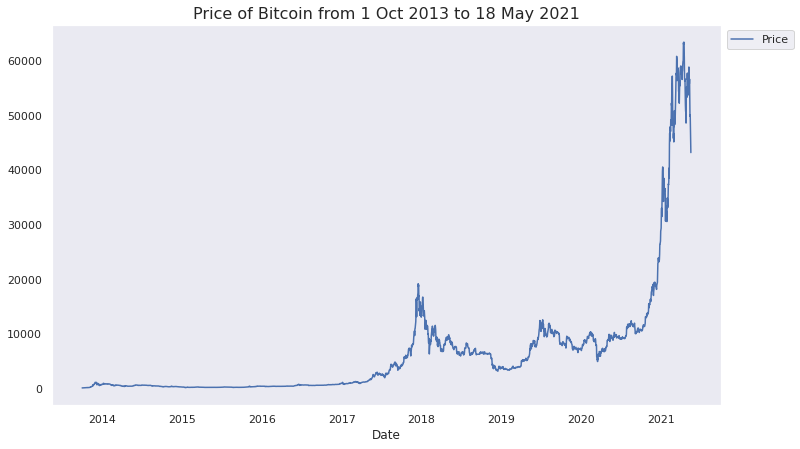

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.lineplot(data=btc_price, ax=ax)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.grid(b=False) 

## Importing time series data with Python's CSV module

In [12]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

In [13]:
timesteps = []
bit_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    bit_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], bit_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

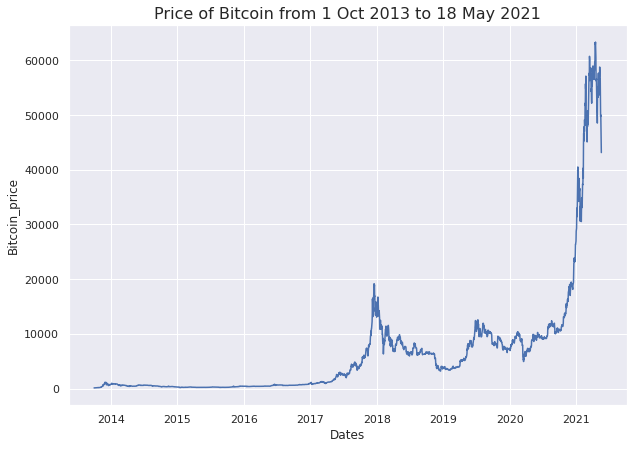

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x=timesteps, y=bit_price, ax=ax)
plt.xlabel("Dates")
plt.ylabel("Bitcoin_price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16);

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [15]:
btc_price[:10]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [16]:
Timesteps = btc_price.index.to_numpy()
prices = btc_price["Price"].to_numpy()

Timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(Timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

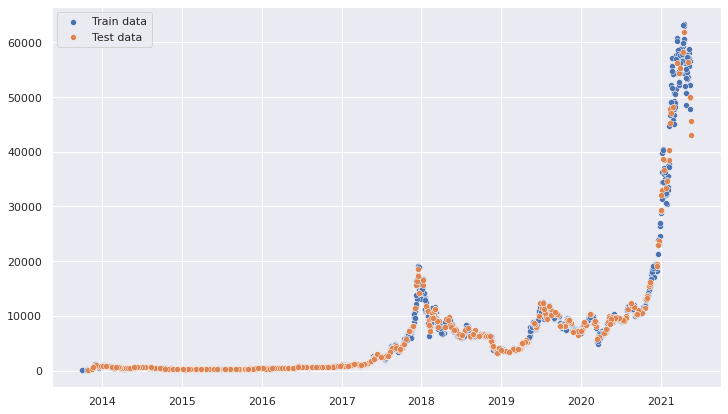

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.scatterplot(x=x_train, y=y_train, ax=ax).set(label="Train data")
sns.scatterplot(x=x_test, y=y_test, ax=ax).set(label="Test data")
plt.legend(["Train data", "Test data"]);

### Create train & test sets for time series (the right way)

In [21]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
x_train, y_train = Timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
x_test, y_test = Timesteps[split_size:], prices[split_size:]

len(x_train), len(x_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

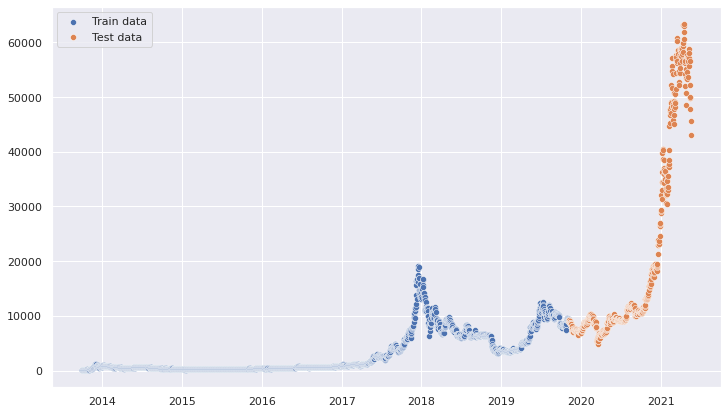

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.scatterplot(x=x_train, y=y_train, ax=ax).set(label="Train data")
sns.scatterplot(x=x_test, y=y_test, ax=ax).set(label="Test data")
plt.legend(["Train data", "Test data"]);

In [23]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


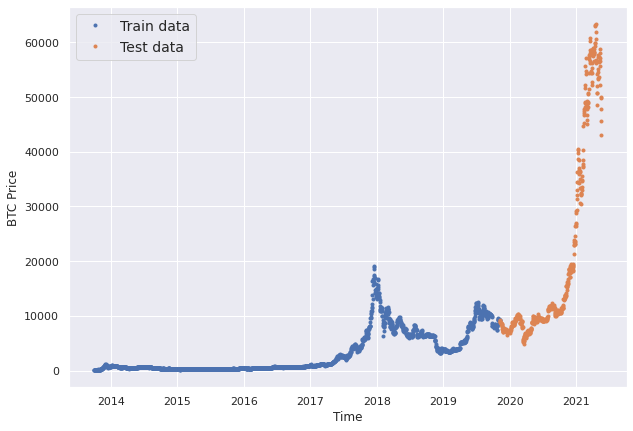

In [24]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:
* 0	Naïve model (baseline)	
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1, 	horizon = 1, window = 30
* 3	Same as 1, 	horizon = 7, window =	30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [25]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [26]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

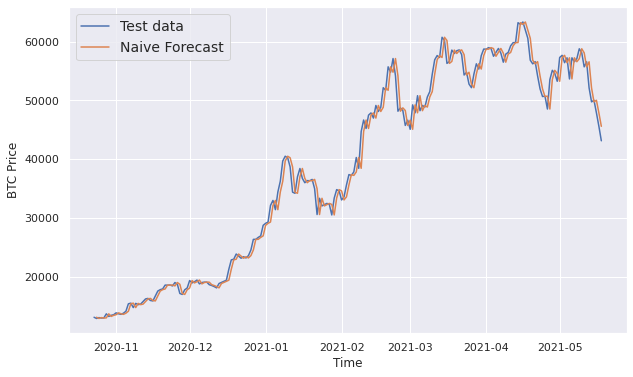

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_time_series(x_test, y_test, format="-", start=350, label="Test data")
plot_time_series(x_test[1:], naive_forecast, format="-", start=350, label="Naive Forecast")

> 🛠 **Exercise:** Spend 10 minutes reading the [simple forecasts chapter of Forecasting: Principles in Practice](https://otexts.com/fpp3/simple-methods.html). And have a search to find out why the naive forecast is hard to beat, does the term augoregressive come up? 

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting. 

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

> 📖 **Resource:** For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html) 

In [28]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [29]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [30]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(), 
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [31]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [32]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [33]:
tf.reduce_mean(y_test[1:]).numpy()

20076.076674945223

In [34]:
tf.reduce_min(y_test[1:]).numpy(), tf.reduce_max(y_test[1:]).numpy()

(4944.7023359837, 63346.7890351052)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [35]:
# What we want to do with our Bitcoin data
print(f"We want to use: {prices[:7]} to predict this: {prices[7]}")

We want to use: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this: 123.033


In [36]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [37]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [38]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label 

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite lsow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example: 
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon 

> 📖 **Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [39]:

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [40]:
full_windows, full_labels = make_windows(prices)

In [41]:
len(full_windows), len(full_labels)

(2780, 2780)

In [42]:
# viewing first 3 windows and horizons
for i in range(3):
  print(f"window: {full_windows[i]} -> label:{full_labels[i]}")

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label:[123.033]
window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label:[124.049]
window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label:[125.96116]


In [43]:
# viewing last 3 windows and horizons
for i in range(3):
  print(f"window:{full_windows[i-3]} -> label:{full_labels[i-3]}")

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> label:[47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> label:[45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> label:[43144.47129086]


> 🔑 **Note:** There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array 

## Turning windows into training and test sets

In [44]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [45]:
def make_train_test_splits(windows, labels, test_size=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  splitsize = int( len(windows) * (1-test_size) )

  train_samples = windows[:split_size]
  train_labels = labels[:split_size]
  test_samples = windows[split_size:]
  test_labels = labels[split_size:]

  return train_samples, test_samples, train_labels, test_labels

In [46]:
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(full_windows, full_labels)

In [47]:
len(train_windows), len(test_windows), len(train_horizons), len(test_horizons)

(2229, 551, 2229, 551)

In [48]:
train_windows[:5], train_horizons[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [49]:
test_windows[:5], test_horizons[:5]

(array([[9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814, 8749.52059102],
        [8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235],
        [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
         8749.52059102, 8656.97092235, 8500.64355816],
        [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
         8656.97092235, 8500.64355816, 8469.2608989 ],
        [8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
         8500.64355816, 8469.2608989 , 8537.33965197]]),
 array([[8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]))

In [50]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_horizons[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [51]:
# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128 (previously we've used 32) 
* 100 epochs 

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learns on its own

In [52]:
from tensorflow.keras import layers

In [53]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_horizons,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1484.2262 - mae: 1484.2262 - mse: 7807787.5000 

18/18 [==============================] - 9s 126ms/step - loss: 1484.2262 - mae: 1484.2262 - mse: 7807787.5000 - val_loss: 2399.1597 - val_mae: 2399.1597 - val_mse: 13995147.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 339.5707 - mae: 339.5707 - mse: 446729.3125

18/18 [==============================] - 1s 85ms/step - loss: 339.5707 - mae: 339.5707 - mse: 446729.3125 - val_loss: 1862.3457 - val_mae: 1862.3457 - val_mse: 8182473.5000
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 228.6159 - mae: 228.6159 - mse: 260357.5938

18/18 [==============================] - 3s 187ms/step - loss: 220.3802 - mae: 220.3802 - mse: 237677.5156 - val_loss: 1270.4247 - val_mae: 1270.4247 - val_mse: 4421649.5000
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 189.4250 - mae: 189.4250 - mse: 176389.5000

18/18 [==============================] - 2s 109ms/step - loss: 189.3033 - mae: 189.3033 - mse: 185220.2188 - val_loss: 1062.0293 - val_mae: 1062.0293 - val_mse: 3570017.0000
Epoch 5/100
 9/18 [==============>...............] - ETA: 0s - loss: 188.2368 - mae: 188.2368 - mse: 192651.2656

18/18 [==============================] - 2s 126ms/step - loss: 180.3704 - mae: 180.3704 - mse: 174173.3594 - val_loss: 1020.8693 - val_mae: 1020.8693 - val_mse: 3389726.7500
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 176.8054 - mae: 176.8054 - mse: 167540.3281

18/18 [==============================] - 2s 116ms/step - loss: 176.8054 - mae: 176.8054 - mse: 167540.3281 - val_loss: 995.0214 - val_mae: 995.0214 - val_mse: 3243682.7500
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 173.9681 - mae: 173.9681 - mse: 162611.3594 - val_loss: 999.3557 - val_mae: 999.3557 - val_mse: 3163619.0000
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 174.1789 - mae: 174.1789 - mse: 177100.9062

18/18 [==============================] - 1s 85ms/step - loss: 169.7624 - mae: 169.7624 - mse: 155859.7188 - val_loss: 944.9178 - val_mae: 944.9178 - val_mse: 2961405.7500
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 165.6666 - mae: 165.6666 - mse: 148541.3281 - val_loss: 1011.9675 - val_mae: 1011.9675 - val_mse: 3048032.7500
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 160.9946 - mae: 160.9946 - mse: 139795.1406

18/18 [==============================] - 2s 88ms/step - loss: 162.6600 - mae: 162.6600 - mse: 140691.2344 - val_loss: 902.5337 - val_mae: 902.5337 - val_mse: 2667543.7500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 154.8034 - mae: 154.8034 - mse: 131879.3750

18/18 [==============================] - 3s 171ms/step - loss: 154.8034 - mae: 154.8034 - mse: 131879.3750 - val_loss: 860.1510 - val_mae: 860.1510 - val_mse: 2397097.7500
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 150.1684 - mae: 150.1684 - mse: 124056.7656

18/18 [==============================] - 1s 76ms/step - loss: 149.5121 - mae: 149.5121 - mse: 122489.4219 - val_loss: 851.6206 - val_mae: 851.6206 - val_mse: 2285381.0000
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 131.0123 - mae: 131.0123 - mse: 94627.4688

18/18 [==============================] - 1s 71ms/step - loss: 144.5600 - mae: 144.5600 - mse: 117192.5859 - val_loss: 812.7734 - val_mae: 812.7734 - val_mse: 2120182.5000
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 137.7689 - mae: 137.7689 - mse: 108121.0859

18/18 [==============================] - 1s 67ms/step - loss: 137.7689 - mae: 137.7689 - mse: 108121.0859 - val_loss: 783.0134 - val_mae: 783.0134 - val_mse: 1965008.8750
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 135.5808 - mae: 135.5808 - mse: 102286.7422

18/18 [==============================] - 1s 75ms/step - loss: 135.0096 - mae: 135.0096 - mse: 104379.4297 - val_loss: 751.5350 - val_mae: 751.5350 - val_mse: 1879194.2500
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 143.0030 - mae: 143.0030 - mse: 102389.2422

18/18 [==============================] - 1s 69ms/step - loss: 140.8938 - mae: 140.8938 - mse: 106306.3828 - val_loss: 738.7489 - val_mae: 738.7489 - val_mse: 1829982.5000
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 128.9136 - mae: 128.9136 - mse: 87915.2656

18/18 [==============================] - 1s 77ms/step - loss: 133.0403 - mae: 133.0403 - mse: 98707.4531 - val_loss: 723.3819 - val_mae: 723.3819 - val_mse: 1733006.3750
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 132.0198 - mae: 132.0198 - mse: 96216.1953 - val_loss: 733.1470 - val_mae: 733.1470 - val_mse: 1814700.8750
Epoch 19/100
13/18 [====================>.........] - ETA: 0s - loss: 133.1587 - mae: 133.1587 - mse: 88387.2812

18/18 [==============================] - 1s 59ms/step - loss: 130.1398 - mae: 130.1398 - mse: 94162.1797 - val_loss: 699.8772 - val_mae: 699.8772 - val_mse: 1642592.8750
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 124.3343 - mae: 124.3343 - mse: 90422.0859 - val_loss: 755.3077 - val_mae: 755.3077 - val_mse: 1735840.2500
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 124.5456 - mae: 124.5456 - mse: 90732.3984

18/18 [==============================] - 1s 36ms/step - loss: 124.5456 - mae: 124.5456 - mse: 90732.3984 - val_loss: 693.9402 - val_mae: 693.9402 - val_mse: 1569917.8750
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0183 - mae: 124.0183 - mse: 89620.0469 - val_loss: 705.6899 - val_mae: 705.6899 - val_mse: 1580700.2500
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 134.8413 - mae: 134.8413 - mse: 91350.4062

18/18 [==============================] - 1s 45ms/step - loss: 133.2745 - mae: 133.2745 - mse: 89621.3828 - val_loss: 684.3093 - val_mae: 684.3093 - val_mse: 1525834.6250
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 122.2948 - mae: 122.2948 - mse: 87269.3516 - val_loss: 733.7037 - val_mae: 733.7037 - val_mse: 1645263.2500
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1822 - mae: 123.1822 - mse: 87473.4688 - val_loss: 712.4185 - val_mae: 712.4185 - val_mse: 1582323.2500
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 125.6781 - mae: 125.6781 - mse: 92182.7422

18/18 [==============================] - 1s 53ms/step - loss: 123.4283 - mae: 123.4283 - mse: 86578.2734 - val_loss: 658.0743 - val_mae: 658.0743 - val_mse: 1455090.3750
Epoch 27/100
18/18 [==============================] - 0s 9ms/step - loss: 118.0705 - mae: 118.0705 - mse: 83724.5938 - val_loss: 779.2385 - val_mae: 779.2385 - val_mse: 1757557.5000
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 125.1258 - mae: 125.1258 - mse: 88141.4062 - val_loss: 696.7908 - val_mae: 696.7908 - val_mse: 1528499.1250
Epoch 29/100
12/18 [===================>..........] - ETA: 0s - loss: 124.3129 - mae: 124.3129 - mse: 91741.9062

18/18 [==============================] - 1s 39ms/step - loss: 118.4028 - mae: 118.4028 - mse: 83159.0234 - val_loss: 655.9501 - val_mae: 655.9501 - val_mse: 1428309.1250
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 116.0645 - mae: 116.0645 - mse: 82035.0000

18/18 [==============================] - 1s 37ms/step - loss: 115.7063 - mae: 115.7063 - mse: 81157.5781 - val_loss: 654.4880 - val_mae: 654.4880 - val_mse: 1420194.2500
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2639 - mae: 116.2639 - mse: 79919.8984 - val_loss: 656.3808 - val_mae: 656.3808 - val_mse: 1477406.8750
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9071 - mae: 117.9071 - mse: 82594.6406 - val_loss: 736.9781 - val_mae: 736.9781 - val_mse: 1615690.7500
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 119.1746 - mae: 119.1746 - mse: 82569.4141 

18/18 [==============================] - 1s 36ms/step - loss: 119.1746 - mae: 119.1746 - mse: 82569.4141 - val_loss: 651.2155 - val_mae: 651.2155 - val_mse: 1457886.5000
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 121.3827 - mae: 121.3827 - mse: 85417.0469

18/18 [==============================] - 1s 48ms/step - loss: 121.3949 - mae: 121.3949 - mse: 85045.8750 - val_loss: 643.6731 - val_mae: 643.6731 - val_mse: 1431917.8750
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1370 - mae: 117.1370 - mse: 81369.4219 - val_loss: 679.5330 - val_mae: 679.5330 - val_mse: 1538955.6250
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 116.4519 - mae: 116.4519 - mse: 81074.3516

18/18 [==============================] - 1s 34ms/step - loss: 116.4519 - mae: 116.4519 - mse: 81074.3516 - val_loss: 622.0417 - val_mae: 622.0417 - val_mse: 1344571.5000
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 120.1737 - mae: 120.1737 - mse: 77123.7266

18/18 [==============================] - 1s 36ms/step - loss: 113.6082 - mae: 113.6082 - mse: 78498.5625 - val_loss: 620.0209 - val_mae: 620.0209 - val_mse: 1342112.7500
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8950 - mae: 114.8950 - mse: 78344.8516 - val_loss: 732.6072 - val_mae: 732.6072 - val_mse: 1589683.7500
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 115.0747 - mae: 115.0747 - mse: 79684.8516 

18/18 [==============================] - 1s 36ms/step - loss: 115.0747 - mae: 115.0747 - mse: 79684.8516 - val_loss: 617.1594 - val_mae: 617.1594 - val_mse: 1335802.6250
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9654 - mae: 126.9654 - mse: 76315.2188

18/18 [==============================] - 1s 35ms/step - loss: 112.5168 - mae: 112.5168 - mse: 76926.5703 - val_loss: 615.0389 - val_mae: 615.0389 - val_mse: 1328604.5000
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2101 - mae: 112.2101 - mse: 76938.7734 - val_loss: 624.2018 - val_mae: 624.2018 - val_mse: 1362006.8750
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0358 - mae: 113.0358 - mse: 78095.0625 - val_loss: 636.7852 - val_mae: 636.7852 - val_mse: 1346942.1250
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 118.8155 - mae: 118.8155 - mse: 79724.0625 - val_loss: 676.6743 - val_mae: 676.6743 - val_mse: 1502839.8750
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1097 - mae: 115.1097 - mse: 79318.3828 - val_loss: 665.0397 - val_mae: 665.0397 - val_mse: 1409391.3750
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2813 - mae: 115.2813 - m

18/18 [==============================] - 1s 35ms/step - loss: 111.8661 - mae: 111.8661 - mse: 76672.1719 - val_loss: 604.9481 - val_mae: 604.9481 - val_mse: 1291434.2500
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2096 - mae: 111.2096 - mse: 76917.1797 - val_loss: 607.4768 - val_mae: 607.4768 - val_mse: 1304010.3750
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6217 - mae: 110.6217 - mse: 75972.1875 - val_loss: 655.0458 - val_mae: 655.0458 - val_mse: 1379889.3750
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2644 - mae: 114.2644 - mse: 77227.3203 - val_loss: 674.8555 - val_mae: 674.8555 - val_mse: 1426617.5000
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8594 - mae: 116.8594 - mse: 80473.8438 - val_loss: 619.7573 - val_mae: 619.7573 - val_mse: 1336307.2500
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 137.2159 - mae: 137.2159 - mse: 

18/18 [==============================] - 1s 34ms/step - loss: 111.1288 - mae: 111.1288 - mse: 75396.4688 - val_loss: 601.3970 - val_mae: 601.3970 - val_mse: 1270098.6250
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7430 - mae: 112.7430 - mse: 74206.9688 - val_loss: 629.2265 - val_mae: 629.2265 - val_mse: 1357117.5000
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2058 - mae: 111.2058 - mse: 75388.5859 - val_loss: 667.9238 - val_mae: 667.9238 - val_mse: 1405293.1250
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8568 - mae: 114.8568 - mse: 75354.3750 - val_loss: 670.6383 - val_mae: 670.6383 - val_mse: 1460524.8750
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 116.9038 - mae: 116.9038 - mse: 77732.3281

18/18 [==============================] - 1s 35ms/step - loss: 116.9038 - mae: 116.9038 - mse: 77732.3281 - val_loss: 598.5270 - val_mae: 598.5270 - val_mse: 1258944.6250
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0975 - mae: 110.0975 - mse: 74599.6719 - val_loss: 710.1132 - val_mae: 710.1132 - val_mse: 1571071.2500
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7137 - mae: 117.7137 - mse: 80622.2656 - val_loss: 599.4279 - val_mae: 599.4279 - val_mse: 1257844.8750
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0975 - mae: 116.0975 - mse: 76155.4766 - val_loss: 708.7147 - val_mae: 708.7147 - val_mse: 1504879.1250
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3950 - mae: 115.3950 - mse: 76919.4141 - val_loss: 642.5036 - val_mae: 642.5036 - val_mse: 1379715.0000
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 121.9552 - mae: 121.9552 - m

18/18 [==============================] - 1s 37ms/step - loss: 113.1877 - mae: 113.1877 - mse: 77015.8203 - val_loss: 593.0626 - val_mae: 593.0626 - val_mse: 1251431.2500
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1849 - mae: 111.1849 - mse: 74398.9141 - val_loss: 718.8420 - val_mae: 718.8420 - val_mse: 1530944.8750
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 117.8973 - mae: 117.8973 - mse: 78544.4219 - val_loss: 683.4105 - val_mae: 683.4105 - val_mse: 1436507.1250
Epoch 68/100
14/18 [======================>.......] - ETA: 0s - loss: 114.0565 - mae: 114.0565 - mse: 75628.5234

18/18 [==============================] - 1s 54ms/step - loss: 110.8645 - mae: 110.8645 - mse: 72410.9375 - val_loss: 590.0953 - val_mae: 590.0953 - val_mse: 1241157.5000
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 108.5998 - mae: 108.5998 - mse: 72523.3359 - val_loss: 599.8300 - val_mae: 599.8300 - val_mse: 1247118.1250
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 112.8026 - mae: 112.8026 - mse: 75652.1875 - val_loss: 593.6185 - val_mae: 593.6185 - val_mse: 1236406.1250
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4704 - mae: 109.4704 - mse: 72908.5312 - val_loss: 590.3438 - val_mae: 590.3438 - val_mse: 1241094.5000
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 110.5225 - mae: 110.5225 - mse: 76513.4688 

18/18 [==============================] - 1s 41ms/step - loss: 108.5001 - mae: 108.5001 - mse: 73423.8750 - val_loss: 588.0150 - val_mae: 588.0150 - val_mse: 1227779.1250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3054 - mae: 113.3054 - mse: 75475.1484 - val_loss: 624.3655 - val_mae: 624.3655 - val_mse: 1294472.8750
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2022 - mae: 110.2022 - mse: 73633.6875 - val_loss: 596.8170 - val_mae: 596.8170 - val_mse: 1237679.8750
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9751 - mae: 109.9751 - mse: 72507.3047 - val_loss: 625.0844 - val_mae: 625.0844 - val_mse: 1323352.8750
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 128.8302 - mae: 128.8302 - mse: 75637.0703

18/18 [==============================] - 1s 34ms/step - loss: 108.1260 - mae: 108.1260 - mse: 72026.4531 - val_loss: 585.0390 - val_mae: 585.0390 - val_mse: 1223445.2500
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0802 - mae: 110.0802 - mse: 72488.5156 - val_loss: 586.6096 - val_mae: 586.6096 - val_mse: 1228882.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6776 - mae: 108.6776 - mse: 73630.4219 - val_loss: 619.9868 - val_mae: 619.9868 - val_mse: 1282388.0000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1367 - mae: 112.1367 - mse: 74506.3750 - val_loss: 652.8935 - val_mae: 652.8935 - val_mse: 1358579.2500
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0125 - mae: 115.0125 - mse: 73074.1250 - val_loss: 744.1467 - val_mae: 744.1467 - val_mse: 1595738.8750
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2029 - mae: 117.2029 - m

18/18 [==============================] - 1s 34ms/step - loss: 107.8072 - mae: 107.8072 - mse: 71856.9844 - val_loss: 583.3997 - val_mae: 583.3997 - val_mse: 1220089.5000
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2139 - mae: 109.2139 - mse: 71882.5469 - val_loss: 620.0712 - val_mae: 620.0712 - val_mse: 1275233.8750
Epoch 84/100
15/18 [========================>.....] - ETA: 0s - loss: 111.7805 - mae: 111.7805 - mse: 76578.6406 

18/18 [==============================] - 1s 36ms/step - loss: 108.8483 - mae: 108.8483 - mse: 71172.1484 - val_loss: 581.2372 - val_mae: 581.2372 - val_mse: 1211780.8750
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6018 - mae: 113.6018 - mse: 73836.2422 - val_loss: 606.9684 - val_mae: 606.9684 - val_mse: 1247084.5000
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 140.6274 - mae: 140.6274 - mse: 159351.3594

18/18 [==============================] - 1s 37ms/step - loss: 110.0697 - mae: 110.0697 - mse: 72412.7266 - val_loss: 580.0373 - val_mae: 580.0373 - val_mse: 1206265.5000
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2865 - mae: 107.2865 - mse: 71199.8516 - val_loss: 593.4792 - val_mae: 593.4792 - val_mse: 1221502.1250
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7285 - mae: 110.7285 - mse: 71815.5078 - val_loss: 693.6472 - val_mae: 693.6472 - val_mse: 1485367.8750
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6239 - mae: 108.6239 - mse: 72825.1172 - val_loss: 661.0174 - val_mae: 661.0174 - val_mse: 1373049.6250
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2849 - mae: 115.2849 - mse: 75247.1641 - val_loss: 644.9161 - val_mae: 644.9161 - val_mse: 1333431.7500
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9920 - mae: 113.9920 - m

18/18 [==============================] - 1s 48ms/step - loss: 112.5920 - mae: 112.5920 - mse: 71856.2578 - val_loss: 579.6285 - val_mae: 579.6285 - val_mse: 1204564.5000
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7512 - mae: 108.7512 - mse: 72149.3906 - val_loss: 600.5425 - val_mae: 600.5425 - val_mse: 1233448.2500
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9113 - mae: 112.9113 - mse: 73767.1172 - val_loss: 612.5260 - val_mae: 612.5260 - val_mse: 1257535.3750
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9013 - mae: 106.9013 - mse: 70224.8359 - val_loss: 608.4545 - val_mae: 608.4545 - val_mse: 1248035.1250
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2551 - mae: 114.2551 - mse: 72021.8594 - val_loss: 679.8044 - val_mae: 679.8044 - val_mse: 1443215.3750
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0526 - mae: 111.0526 - m

In [54]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_1.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 645.4564 - mae: 645.4564 - mse: 1354234.6250


[645.4563598632812, 645.4563598632812, 1354234.625]

In [56]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 579.6284 - mae: 579.6284 - mse: 1204564.3750


[579.62841796875, 579.62841796875, 1204564.375]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions 

In [57]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [58]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(551, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8791.46  , 8749.373 , 8506.576 , 8519.214 , 8558.662 , 8293.03  ,
        8138.0254, 8104.7896, 7732.251 , 7287.0454], dtype=float32)>)

In [59]:
test_horizons.shape, model_1_preds.shape

((551, 1), TensorShape([551]))

In [60]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_horizons),
                                 y_pred=model_1_preds)

In [61]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

In [62]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Here after we'll consider model_1 results for comparison

naive results seems better one. but it is autocorrelated.

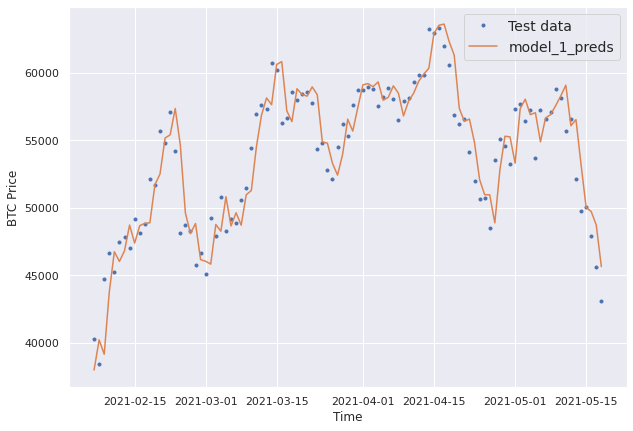

In [63]:
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps = x_test[-len(test_windows):], 
                 values = test_horizons[:, 0],
                 start = offset,
                 label = "Test data")
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [64]:
HORIZON = 1
WINDOW_SIZE = 30

In [65]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [66]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [67]:
full_windows[0].shape

(30,)

In [68]:
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(windows = full_windows,
                                                                                    labels = full_labels,
                                                                                    test_size=0.2)

In [69]:
len(train_windows), len(test_windows), len(train_horizons), len(test_horizons)

(2229, 528, 2229, 528)

In [70]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae", "mse"])

model_2.fit(x=train_windows,
            y=train_horizons,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1693.2930 - mae: 1693.2930 - mse: 10503079.0000 

18/18 [==============================] - 4s 104ms/step - loss: 1289.4460 - mae: 1289.4460 - mse: 7147992.5000 - val_loss: 4521.7642 - val_mae: 4521.7642 - val_mse: 39568304.0000
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 407.3616 - mae: 407.3616 - mse: 635197.1875 

18/18 [==============================] - 1s 71ms/step - loss: 384.4046 - mae: 384.4046 - mse: 577876.8125 - val_loss: 1340.7263 - val_mae: 1340.7263 - val_mse: 5423322.0000
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 272.8622 - mae: 272.8622 - mse: 333508.6875 - val_loss: 1522.1591 - val_mae: 1522.1591 - val_mse: 6154996.5000
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 214.7715 - mae: 214.7715 - mse: 210494.6719

18/18 [==============================] - 1s 82ms/step - loss: 213.5396 - mae: 213.5396 - mse: 217100.9375 - val_loss: 1235.1259 - val_mae: 1235.1259 - val_mse: 4049345.7500
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 189.0290 - mae: 189.0290 - mse: 173362.3125

18/18 [==============================] - 1s 37ms/step - loss: 189.0290 - mae: 189.0290 - mse: 173362.3125 - val_loss: 988.2788 - val_mae: 988.2788 - val_mse: 2919952.2500
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 182.2536 - mae: 182.2536 - mse: 165858.3438

18/18 [==============================] - 1s 36ms/step - loss: 176.7895 - mae: 176.7895 - mse: 153115.1719 - val_loss: 987.9307 - val_mae: 987.9307 - val_mse: 2728837.7500
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 166.8680 - mae: 166.8680 - mse: 137606.0312

18/18 [==============================] - 1s 34ms/step - loss: 166.8680 - mae: 166.8680 - mse: 137606.0312 - val_loss: 898.4786 - val_mae: 898.4786 - val_mse: 2580858.2500
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 177.7082 - mae: 177.7082 - mse: 155110.8906

18/18 [==============================] - 1s 54ms/step - loss: 172.0233 - mae: 172.0233 - mse: 145426.6719 - val_loss: 884.6991 - val_mae: 884.6991 - val_mse: 2411924.2500
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 161.1754 - mae: 161.1754 - mse: 130744.1875 - val_loss: 1019.6201 - val_mae: 1019.6201 - val_mse: 2764696.2500
Epoch 10/100
18/18 [==============================] - 0s 8ms/step - loss: 171.6762 - mae: 171.6762 - mse: 132113.7969 - val_loss: 1146.8149 - val_mae: 1146.8149 - val_mse: 3319968.0000
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 165.2699 - mae: 165.2699 - mse: 127737.7266 - val_loss: 892.0831 - val_mae: 892.0831 - val_mse: 2328977.2500
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6566 - mae: 157.6566 - mse: 129073.1250 - val_loss: 943.6667 - val_mae: 943.6667 - val_mse: 2471273.2500
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 151.9803 - mae: 151.

18/18 [==============================] - 1s 46ms/step - loss: 168.0268 - mae: 168.0268 - mse: 130829.5781 - val_loss: 836.4434 - val_mae: 836.4434 - val_mse: 2143106.5000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 176.0687 - mae: 176.0687 - mse: 142539.5312 - val_loss: 897.2169 - val_mae: 897.2169 - val_mse: 2539346.7500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 160.2225 - mae: 160.2225 - mse: 126834.7422

18/18 [==============================] - 1s 34ms/step - loss: 160.0408 - mae: 160.0408 - mse: 120818.7891 - val_loss: 795.8151 - val_mae: 795.8151 - val_mse: 2052401.0000
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 163.3902 - mae: 163.3902 - mse: 125051.0312

18/18 [==============================] - 1s 49ms/step - loss: 163.3902 - mae: 163.3902 - mse: 125051.0312 - val_loss: 791.6443 - val_mae: 791.6443 - val_mse: 2047136.7500
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 154.1386 - mae: 154.1386 - mse: 115766.9922 - val_loss: 797.6909 - val_mae: 797.6909 - val_mse: 2081997.6250
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 143.3854 - mae: 143.3854 - mse: 104622.8047 - val_loss: 801.2062 - val_mae: 801.2062 - val_mse: 1996558.0000
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 155.0850 - mae: 155.0850 - mse: 114731.9922 - val_loss: 805.7186 - val_mae: 805.7186 - val_mse: 1989079.6250
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 143.8427 - mae: 143.8427 - mse: 104431.2656

18/18 [==============================] - 1s 35ms/step - loss: 143.3086 - mae: 143.3086 - mse: 103065.7656 - val_loss: 790.4166 - val_mae: 790.4166 - val_mse: 1939846.5000
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 145.4659 - mae: 145.4659 - mse: 106640.1484 - val_loss: 862.4127 - val_mae: 862.4127 - val_mse: 2327293.5000
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 142.7959 - mae: 142.7959 - mse: 103514.9766 - val_loss: 826.2468 - val_mae: 826.2468 - val_mse: 2018091.6250
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 143.7976 - mae: 143.7976 - mse: 106519.9219

18/18 [==============================] - 1s 36ms/step - loss: 143.7976 - mae: 143.7976 - mse: 106519.9219 - val_loss: 756.8667 - val_mae: 756.8667 - val_mse: 1851237.0000
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 137.2599 - mae: 137.2599 - mse: 97647.9531 - val_loss: 790.0135 - val_mae: 790.0135 - val_mse: 1907619.6250
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 146.1416 - mae: 146.1416 - mse: 105841.3203 - val_loss: 775.3903 - val_mae: 775.3903 - val_mse: 1959869.3750
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 135.3005 - mae: 135.3005 - mse: 96678.2656 - val_loss: 1005.1541 - val_mae: 1005.1541 - val_mse: 2919249.5000
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 151.3769 - mae: 151.3769 - mse: 113239.4688 - val_loss: 850.0585 - val_mae: 850.0585 - val_mse: 2258182.7500
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 146.4779 - mae: 146.4779 - 

18/18 [==============================] - 1s 36ms/step - loss: 146.4779 - mae: 146.4779 - mse: 101824.5234 - val_loss: 735.2084 - val_mae: 735.2084 - val_mse: 1777256.8750
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 135.8633 - mae: 135.8633 - mse: 93505.4609 - val_loss: 814.2838 - val_mae: 814.2838 - val_mse: 1960960.6250
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 158.1588 - mae: 158.1588 - mse: 111625.6641 - val_loss: 741.1039 - val_mae: 741.1039 - val_mse: 1748570.7500
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 136.9610 - mae: 136.9610 - mse: 93902.3438 - val_loss: 741.2087 - val_mae: 741.2087 - val_mse: 1807757.1250
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 132.1300 - mae: 132.1300 - mse: 71091.7422

18/18 [==============================] - 1s 36ms/step - loss: 131.7601 - mae: 131.7601 - mse: 91834.9766 - val_loss: 727.9130 - val_mae: 727.9130 - val_mse: 1694246.0000
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 131.2088 - mae: 131.2088 - mse: 90207.2109

18/18 [==============================] - 1s 37ms/step - loss: 131.2088 - mae: 131.2088 - mse: 90207.2109 - val_loss: 714.4564 - val_mae: 714.4564 - val_mse: 1671378.5000
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 128.5452 - mae: 128.5452 - mse: 90341.2500 - val_loss: 718.1687 - val_mae: 718.1687 - val_mse: 1707392.6250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 132.7412 - mae: 132.7412 - mse: 92844.8516 - val_loss: 773.1796 - val_mae: 773.1796 - val_mse: 1823180.1250
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 130.9063 - mae: 130.9063 - mse: 90746.9688 - val_loss: 721.2662 - val_mae: 721.2662 - val_mse: 1722663.3750
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 144.6038 - mae: 144.6038 - mse: 94677.3594 - val_loss: 817.4310 - val_mae: 817.4310 - val_mse: 1941986.6250
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 140.1290 - mae: 140.1290 - m

18/18 [==============================] - 1s 35ms/step - loss: 131.8502 - mae: 131.8502 - mse: 89082.2734 - val_loss: 693.9142 - val_mae: 693.9142 - val_mse: 1610477.6250
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 130.9690 - mae: 130.9690 - mse: 87046.3047 - val_loss: 746.0399 - val_mae: 746.0399 - val_mse: 1797844.3750
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 132.0941 - mae: 132.0941 - mse: 90514.0781 - val_loss: 811.9587 - val_mae: 811.9587 - val_mse: 1908200.1250
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 128.9434 - mae: 128.9434 - mse: 88011.3594 - val_loss: 714.8501 - val_mae: 714.8501 - val_mse: 1639262.7500
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 131.2352 - mae: 131.2352 - mse: 91119.6016 - val_loss: 854.9949 - val_mae: 854.9949 - val_mse: 2032051.8750
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 146.9962 - mae: 146.9962 - m

18/18 [==============================] - 1s 36ms/step - loss: 140.3666 - mae: 140.3666 - mse: 95958.0703 - val_loss: 673.9640 - val_mae: 673.9640 - val_mse: 1510772.2500
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 131.1738 - mae: 131.1738 - mse: 88859.1250 - val_loss: 796.8077 - val_mae: 796.8077 - val_mse: 1955737.2500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 133.4301 - mae: 133.4301 - mse: 88852.1172 - val_loss: 675.3475 - val_mae: 675.3475 - val_mse: 1530004.0000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 127.1540 - mae: 127.1540 - mse: 82212.8125 - val_loss: 689.8225 - val_mae: 689.8225 - val_mse: 1545512.7500
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 139.8840 - mae: 139.8840 - mse: 95305.2656 - val_loss: 1158.9938 - val_mae: 1158.9938 - val_mse: 3180896.2500
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 136.2545 - mae: 136.2545 - mse

18/18 [==============================] - 1s 35ms/step - loss: 136.2545 - mae: 136.2545 - mse: 90177.6719 - val_loss: 664.8397 - val_mae: 664.8397 - val_mse: 1494631.7500
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 135.7657 - mae: 135.7657 - mse: 89303.0078 - val_loss: 947.3242 - val_mae: 947.3242 - val_mse: 2541444.7500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 150.9268 - mae: 150.9268 - mse: 106756.4375 - val_loss: 695.0510 - val_mae: 695.0510 - val_mse: 1596561.1250
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2221 - mae: 124.2221 - mse: 83767.9062 - val_loss: 693.3777 - val_mae: 693.3777 - val_mse: 1589548.7500
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 125.3933 - mae: 125.3933 - mse: 82492.4297 - val_loss: 860.3121 - val_mae: 860.3121 - val_mse: 2182370.5000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 137.9839 - mae: 137.9839 - 

18/18 [==============================] - 1s 51ms/step - loss: 129.6613 - mae: 129.6613 - mse: 85468.2500 - val_loss: 662.5740 - val_mae: 662.5740 - val_mse: 1467812.5000
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 124.1164 - mae: 124.1164 - mse: 83676.4297 - val_loss: 664.0361 - val_mae: 664.0361 - val_mse: 1488032.3750
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 128.5832 - mae: 128.5832 - mse: 86886.9453 - val_loss: 836.7242 - val_mae: 836.7242 - val_mse: 1932923.3750
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 136.4914 - mae: 136.4914 - mse: 87428.8750 - val_loss: 676.2061 - val_mae: 676.2061 - val_mse: 1487179.2500
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 118.0926 - mae: 118.0926 - mse: 76038.0547 - val_loss: 682.5159 - val_mae: 682.5159 - val_mse: 1540140.2500
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 127.9721 - mae: 127.9721 - 

18/18 [==============================] - 1s 82ms/step - loss: 122.8411 - mae: 122.8411 - mse: 78840.4297 - val_loss: 660.7082 - val_mae: 660.7082 - val_mse: 1441282.5000
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 121.5066 - mae: 121.5066 - mse: 79008.8438 - val_loss: 971.2224 - val_mae: 971.2224 - val_mse: 2399068.0000
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 126.2221 - mae: 126.2221 - mse: 82033.6875 - val_loss: 666.8088 - val_mae: 666.8088 - val_mse: 1462739.6250
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 124.8676 - mae: 124.8676 - mse: 81119.0469 - val_loss: 761.8193 - val_mae: 761.8193 - val_mse: 1790775.0000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 178.2571 - mae: 178.2571 - mse: 111746.6172

18/18 [==============================] - 1s 34ms/step - loss: 127.6610 - mae: 127.6610 - mse: 86323.0000 - val_loss: 652.3092 - val_mae: 652.3092 - val_mse: 1448076.7500
Epoch 69/100
16/18 [=========================>....] - ETA: 0s - loss: 127.4755 - mae: 127.4755 - mse: 81984.5078

18/18 [==============================] - 1s 35ms/step - loss: 128.8972 - mae: 128.8972 - mse: 85424.4141 - val_loss: 643.0133 - val_mae: 643.0133 - val_mse: 1415496.7500
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 147.2463 - mae: 147.2463 - mse: 98576.9766 - val_loss: 665.2723 - val_mae: 665.2723 - val_mse: 1485329.6250
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 125.7932 - mae: 125.7932 - mse: 82113.4453 - val_loss: 943.5145 - val_mae: 943.5145 - val_mse: 2304882.7500
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6806 - mae: 146.6806 - mse: 127499.8594

18/18 [==============================] - 1s 34ms/step - loss: 120.1275 - mae: 120.1275 - mse: 79718.4453 - val_loss: 634.5609 - val_mae: 634.5609 - val_mse: 1385100.3750
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 122.9371 - mae: 122.9371 - mse: 81403.1797 - val_loss: 836.2753 - val_mae: 836.2753 - val_mse: 1934525.8750
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 136.6310 - mae: 136.6310 - mse: 87119.5781 - val_loss: 797.0134 - val_mae: 797.0134 - val_mse: 1805458.5000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1337 - mae: 122.1337 - mse: 77377.8828 - val_loss: 679.2667 - val_mae: 679.2667 - val_mse: 1472076.6250
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 117.9171 - mae: 117.9171 - mse: 76554.4766 - val_loss: 646.5415 - val_mae: 646.5415 - val_mse: 1400306.0000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8469 - mae: 119.8469 - m

18/18 [==============================] - 1s 36ms/step - loss: 119.2356 - mae: 119.2356 - mse: 76576.0938 - val_loss: 625.4496 - val_mae: 625.4496 - val_mse: 1352827.2500
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5152 - mae: 111.5152 - mse: 71664.9062 - val_loss: 644.8477 - val_mae: 644.8477 - val_mse: 1389677.3750
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0347 - mae: 116.0347 - mse: 74949.9688 - val_loss: 664.2518 - val_mae: 664.2518 - val_mse: 1464231.2500
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 119.4893 - mae: 119.4893 - mse: 78375.8750 - val_loss: 637.8351 - val_mae: 637.8351 - val_mse: 1363860.3750
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 121.6925 - mae: 121.6925 - mse: 77048.1094 - val_loss: 824.9633 - val_mae: 824.9633 - val_mse: 1971543.2500
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4279 - mae: 115.4279 - m

In [71]:
model_2.evaluate(test_windows, test_horizons)

17/17 [==============================] - 0s 3ms/step - loss: 638.1718 - mae: 638.1718 - mse: 1359670.6250


[638.1717529296875, 638.1717529296875, 1359670.625]

In [72]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_horizons)

17/17 [==============================] - 0s 3ms/step - loss: 625.4496 - mae: 625.4496 - mse: 1352827.3750


[625.4495849609375, 625.4495849609375, 1352827.375]

In [73]:
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

17/17 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([7477.257 , 7550.954 , 7627.27  , 7376.4614, 7343.2817, 7179.266 ,
       7171.705 , 7191.944 , 7123.7725, 7148.3447], dtype=float32)>

In [74]:
model_2_preds.shape, test_horizons.shape

(TensorShape([528]), (528, 1))

In [75]:
model_2_results = evaluate_preds(tf.squeeze(test_horizons), model_2_preds)
model_2_results

{'mae': 625.4496,
 'mse': 1352827.4,
 'rmse': 1163.1111,
 'mape': 2.7556775,
 'mase': 1.0586216}

In [76]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

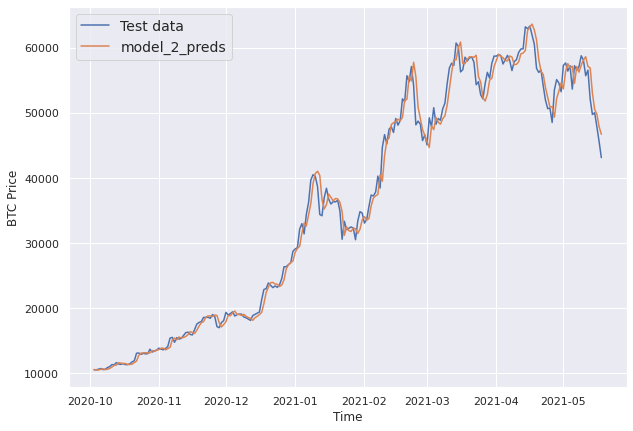

In [77]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps = x_test[-len(test_windows):], 
                 values = test_horizons[:, 0],
                 start = offset,
                 format="-",
                 label = "Test data")
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)



In [78]:
HORIZON = 7
WINDOW_SIZE = 30

In [79]:
full_windows, full_horizons = make_windows(prices, WINDOW_SIZE, HORIZON)

In [80]:
full_windows.shape, full_horizons.shape

((2751, 30), (2751, 7))

In [81]:
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(full_windows, full_horizons)


In [82]:
train_windows.shape, test_windows.shape, train_horizons.shape, test_horizons.shape

((2229, 30), (522, 30), (2229, 7), (522, 7))

In [83]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae", "mse"])

model_3.fit(x=train_windows,
            y=train_horizons,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2646.2964 - mae: 2646.2964 - mse: 24011710.0000 

18/18 [==============================] - 3s 70ms/step - loss: 1852.5337 - mae: 1852.5337 - mse: 14808741.0000 - val_loss: 3887.5203 - val_mae: 3887.5203 - val_mse: 38240768.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 611.7883 - mae: 611.7883 - mse: 1637483.0000

18/18 [==============================] - 1s 34ms/step - loss: 608.1376 - mae: 608.1376 - mse: 1616118.5000 - val_loss: 2831.7051 - val_mae: 2831.7051 - val_mse: 22575608.0000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 433.5595 - mae: 433.5595 - mse: 940304.8750

18/18 [==============================] - 1s 35ms/step - loss: 433.5595 - mae: 433.5595 - mse: 940304.8750 - val_loss: 2181.6614 - val_mae: 2181.6614 - val_mse: 14127551.0000
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 394.7557 - mae: 394.7557 - mse: 778547.2500

18/18 [==============================] - 1s 37ms/step - loss: 394.7557 - mae: 394.7557 - mse: 778547.2500 - val_loss: 2114.8120 - val_mae: 2114.8120 - val_mse: 13386241.0000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 362.3069 - mae: 362.3069 - mse: 665247.0625

18/18 [==============================] - 1s 36ms/step - loss: 362.3069 - mae: 362.3069 - mse: 665247.0625 - val_loss: 1969.2114 - val_mae: 1969.2114 - val_mse: 11920164.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 340.0960 - mae: 340.0960 - mse: 576132.9375

18/18 [==============================] - 1s 35ms/step - loss: 340.0960 - mae: 340.0960 - mse: 576132.9375 - val_loss: 1715.0503 - val_mae: 1715.0503 - val_mse: 9117840.0000
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 320.6046 - mae: 320.6046 - mse: 511475.9375 - val_loss: 1791.4594 - val_mae: 1791.4594 - val_mse: 9856788.0000
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 305.0626 - mae: 305.0626 - mse: 460533.5938

18/18 [==============================] - 1s 34ms/step - loss: 305.0626 - mae: 305.0626 - mse: 460533.5938 - val_loss: 1670.6127 - val_mae: 1670.6127 - val_mse: 8627649.0000
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 296.1272 - mae: 296.1272 - mse: 430950.5938 - val_loss: 1675.5597 - val_mae: 1675.5597 - val_mse: 8705794.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 285.3606 - mae: 285.3606 - mse: 406610.5000

18/18 [==============================] - 1s 35ms/step - loss: 285.3606 - mae: 285.3606 - mse: 406610.5000 - val_loss: 1536.0085 - val_mae: 1536.0085 - val_mse: 7603592.0000
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 283.8576 - mae: 283.8576 - mse: 396262.5000 - val_loss: 1634.6891 - val_mae: 1634.6891 - val_mse: 8356770.0000
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 276.3006 - mae: 276.3006 - mse: 381786.0000

18/18 [==============================] - 1s 34ms/step - loss: 276.3006 - mae: 276.3006 - mse: 381786.0000 - val_loss: 1507.8369 - val_mae: 1507.8369 - val_mse: 7311426.0000
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 276.5491 - mae: 276.5491 - mse: 381543.8438 - val_loss: 1569.5951 - val_mae: 1569.5951 - val_mse: 7701170.0000
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 271.6967 - mae: 271.6967 - mse: 368952.7188 - val_loss: 1579.2014 - val_mae: 1579.2014 - val_mse: 7777572.5000
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 269.9310 - mae: 269.9310 - mse: 364879.2500 - val_loss: 1708.0195 - val_mae: 1708.0195 - val_mse: 8528130.0000
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 266.3978 - mae: 266.3978 - mse: 358304.4688

18/18 [==============================] - 1s 35ms/step - loss: 266.3978 - mae: 266.3978 - mse: 358304.4688 - val_loss: 1451.0880 - val_mae: 1451.0880 - val_mse: 6980738.0000
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 267.5289 - mae: 267.5289 - mse: 355878.7188 - val_loss: 1515.2955 - val_mae: 1515.2955 - val_mse: 7398318.5000
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 261.2302 - mae: 261.2302 - mse: 349076.2812 - val_loss: 1531.9176 - val_mae: 1531.9176 - val_mse: 7362613.5000
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 252.8230 - mae: 252.8230 - mse: 332083.9062 - val_loss: 1456.2596 - val_mae: 1456.2596 - val_mse: 6861756.0000
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 255.4588 - mae: 255.4588 - mse: 334222.9688 - val_loss: 1547.0291 - val_mae: 1547.0291 - val_mse: 7292867.5000
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 252.3010 - ma

18/18 [==============================] - 1s 36ms/step - loss: 250.3237 - mae: 250.3237 - mse: 324684.9062 - val_loss: 1402.0072 - val_mae: 1402.0072 - val_mse: 6586585.5000
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 248.9702 - mae: 248.9702 - mse: 321988.7188 - val_loss: 1431.1282 - val_mae: 1431.1282 - val_mse: 6661901.0000
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 249.3942 - mae: 249.3942 - mse: 324335.6250 - val_loss: 1480.8501 - val_mae: 1480.8501 - val_mse: 6976361.5000
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 250.9467 - mae: 250.9467 - mse: 319602.0312 - val_loss: 1488.8973 - val_mae: 1488.8973 - val_mse: 7067165.5000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 246.8940 - mae: 246.8940 - mse: 313929.2188 - val_loss: 1427.3441 - val_mae: 1427.3441 - val_mse: 6718486.5000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 244.2352 - ma

18/18 [==============================] - 1s 34ms/step - loss: 244.4774 - mae: 244.4774 - mse: 308864.9688 - val_loss: 1397.6149 - val_mae: 1397.6149 - val_mse: 6511618.5000
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 241.0663 - mae: 241.0663 - mse: 305400.0312

18/18 [==============================] - 1s 35ms/step - loss: 241.0663 - mae: 241.0663 - mse: 305400.0312 - val_loss: 1384.8712 - val_mae: 1384.8712 - val_mse: 6384702.5000
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 241.6280 - mae: 241.6280 - mse: 297001.5312

18/18 [==============================] - 1s 35ms/step - loss: 244.7670 - mae: 244.7670 - mse: 304271.9688 - val_loss: 1370.9675 - val_mae: 1370.9675 - val_mse: 6298454.5000
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 245.3216 - mae: 245.3216 - mse: 309266.1250 - val_loss: 1440.6239 - val_mae: 1440.6239 - val_mse: 6831623.0000
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 245.2023 - mae: 245.2023 - mse: 305406.6250 - val_loss: 1402.8616 - val_mae: 1402.8616 - val_mse: 6398717.5000
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 242.0469 - mae: 242.0469 - mse: 303948.7812 - val_loss: 1551.4681 - val_mae: 1551.4681 - val_mse: 7248880.0000
Epoch 34/100
18/18 [==============================] - 0s 7ms/step - loss: 243.1339 - mae: 243.1339 - mse: 302745.4062 - val_loss: 1390.1920 - val_mae: 1390.1920 - val_mse: 6312376.5000
Epoch 35/100
13/18 [====================>.........] - ETA: 0s - loss: 238.2991 - mae: 2

18/18 [==============================] - 1s 58ms/step - loss: 238.9514 - mae: 238.9514 - mse: 299103.6562 - val_loss: 1366.4062 - val_mae: 1366.4062 - val_mse: 6297497.5000
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 238.9631 - mae: 238.9631 - mse: 299502.9688 - val_loss: 1572.7727 - val_mae: 1572.7727 - val_mse: 7181749.5000
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 244.5538 - mae: 244.5538 - mse: 303290.1875 - val_loss: 1418.0312 - val_mae: 1418.0312 - val_mse: 6557487.5000
Epoch 38/100
18/18 [==============================] - 0s 8ms/step - loss: 238.3739 - mae: 238.3739 - mse: 296232.0938 - val_loss: 1405.5228 - val_mae: 1405.5228 - val_mse: 6389767.0000
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 235.1699 - mae: 235.1699 - mse: 288473.9062

18/18 [==============================] - 1s 62ms/step - loss: 237.0157 - mae: 237.0157 - mse: 293525.3125 - val_loss: 1361.0458 - val_mae: 1361.0458 - val_mse: 6172945.5000
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 235.0407 - mae: 235.0407 - mse: 290689.1875 - val_loss: 1402.9041 - val_mae: 1402.9041 - val_mse: 6344976.5000
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 278.0020 - mae: 278.0020 - mse: 371761.0000

18/18 [==============================] - 1s 36ms/step - loss: 235.9321 - mae: 235.9321 - mse: 291727.0938 - val_loss: 1335.8590 - val_mae: 1335.8590 - val_mse: 6071185.0000
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 238.7179 - mae: 238.7179 - mse: 294735.1875 - val_loss: 1395.5684 - val_mae: 1395.5684 - val_mse: 6315396.5000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 233.0387 - mae: 233.0387 - mse: 284948.3438 - val_loss: 1450.5897 - val_mae: 1450.5897 - val_mse: 6468221.0000
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 239.8366 - mae: 239.8366 - mse: 296662.0625 - val_loss: 1464.8906 - val_mae: 1464.8906 - val_mse: 6730863.5000
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 236.6527 - mae: 236.6527 - mse: 290503.7188 - val_loss: 1363.4462 - val_mae: 1363.4462 - val_mse: 6094914.0000
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 231.2929 - ma

18/18 [==============================] - 1s 35ms/step - loss: 234.7213 - mae: 234.7213 - mse: 282326.0000 - val_loss: 1334.6006 - val_mae: 1334.6006 - val_mse: 5984461.5000
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 235.5554 - mae: 235.5554 - mse: 287853.9375 - val_loss: 1337.0889 - val_mae: 1337.0889 - val_mse: 6197233.5000
Epoch 50/100
18/18 [==============================] - ETA: 0s - loss: 244.5889 - mae: 244.5889 - mse: 296765.5000

18/18 [==============================] - 1s 35ms/step - loss: 244.5889 - mae: 244.5889 - mse: 296765.5000 - val_loss: 1333.9901 - val_mae: 1333.9901 - val_mse: 6010754.5000
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 231.7339 - mae: 231.7339 - mse: 280842.1250 - val_loss: 1339.4760 - val_mae: 1339.4760 - val_mse: 5984285.0000
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 231.8978 - mae: 231.8978 - mse: 281748.2500 - val_loss: 1434.8806 - val_mae: 1434.8806 - val_mse: 6472844.0000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 234.2488 - mae: 234.2488 - mse: 284604.4062 - val_loss: 1414.4330 - val_mae: 1414.4330 - val_mse: 6220617.5000
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 236.0749 - mae: 236.0749 - mse: 281914.9375

18/18 [==============================] - 1s 35ms/step - loss: 236.0749 - mae: 236.0749 - mse: 281914.9375 - val_loss: 1321.0879 - val_mae: 1321.0879 - val_mse: 5872282.0000
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 231.5414 - mae: 231.5414 - mse: 279031.7812 - val_loss: 1406.5197 - val_mae: 1406.5197 - val_mse: 6258870.0000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 236.0947 - mae: 236.0947 - mse: 284448.9375 - val_loss: 1406.6135 - val_mae: 1406.6135 - val_mse: 6247786.0000
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 231.8418 - mae: 231.8418 - mse: 278427.5625

18/18 [==============================] - 1s 34ms/step - loss: 231.8418 - mae: 231.8418 - mse: 278427.5625 - val_loss: 1310.0281 - val_mae: 1310.0281 - val_mse: 5784209.5000
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 230.6508 - mae: 230.6508 - mse: 280573.3438 - val_loss: 1397.3453 - val_mae: 1397.3453 - val_mse: 6220620.0000
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 233.9630 - mae: 233.9630 - mse: 282857.0625 - val_loss: 1475.1133 - val_mae: 1475.1133 - val_mse: 6594939.5000
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 232.9998 - mae: 232.9998 - mse: 280581.5625 - val_loss: 1412.9923 - val_mae: 1412.9923 - val_mse: 6238833.5000
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 228.5535 - mae: 228.5535 - mse: 273547.5000 - val_loss: 1321.9100 - val_mae: 1321.9100 - val_mse: 5890782.0000
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 232.0715 - ma

18/18 [==============================] - 1s 35ms/step - loss: 228.4337 - mae: 228.4337 - mse: 271863.6562 - val_loss: 1294.6897 - val_mae: 1294.6897 - val_mse: 5750060.0000
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 270.0576 - mae: 270.0576 - mse: 373653.6250

18/18 [==============================] - 1s 34ms/step - loss: 231.3115 - mae: 231.3115 - mse: 275399.4062 - val_loss: 1289.5107 - val_mae: 1289.5107 - val_mse: 5723754.0000
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 224.8869 - mae: 224.8869 - mse: 266970.9375 - val_loss: 1378.8285 - val_mae: 1378.8285 - val_mse: 6135811.0000
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 227.0235 - mae: 227.0235 - mse: 270801.6250 - val_loss: 1411.0587 - val_mae: 1411.0587 - val_mse: 6145172.5000
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 230.7956 - mae: 230.7956 - mse: 275800.3750 - val_loss: 1399.6172 - val_mae: 1399.6172 - val_mse: 6173070.5000
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 230.2934 - mae: 230.2934 - mse: 270079.7188 - val_loss: 1364.8636 - val_mae: 1364.8636 - val_mse: 6023894.5000
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 231.2577 - ma

In [84]:
model_3.evaluate(test_windows, test_horizons)

17/17 [==============================] - 0s 4ms/step - loss: 1311.3745 - mae: 1311.3745 - mse: 5744376.5000


[1311.37451171875, 1311.37451171875, 5744376.5]

In [85]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_horizons)

17/17 [==============================] - 0s 4ms/step - loss: 1289.5107 - mae: 1289.5107 - mse: 5723755.0000


[1289.5107421875, 1289.5107421875, 5723755.0]

In [86]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds

17/17 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(522, 7), dtype=float32, numpy=
array([[ 7622.948 ,  7435.7773,  7499.5034, ...,  7446.769 ,  7516.5327,
         7334.023 ],
       [ 7561.5337,  7518.7993,  7551.1323, ...,  7543.015 ,  7427.617 ,
         7454.8306],
       [ 7695.918 ,  7479.0215,  7535.0757, ...,  7508.4077,  7459.2993,
         7555.777 ],
       ...,
       [58389.863 , 58685.195 , 59042.867 , ..., 59868.625 , 58503.38  ,
        57816.68  ],
       [59321.207 , 58304.383 , 59110.562 , ..., 60871.73  , 60560.402 ,
        58707.176 ],
       [57915.37  , 58049.438 , 58296.277 , ..., 60105.31  , 58857.844 ,
        59235.434 ]], dtype=float32)>

## Make our evaluation function work for larger horizons

In [87]:
tf.squeeze(test_horizons).shape

TensorShape([522, 7])

In [88]:
# Adjusting the evaluate_preds function for various shapes
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(), 
          "mape":mape.numpy(),
          "mase":mase.numpy()}


In [89]:
model_3_results = evaluate_preds(test_horizons,
                                 model_3_preds)
model_3_results

{'mae': 1289.5107,
 'mse': 5723754.0,
 'rmse': 1481.7637,
 'mape': 5.5585303,
 'mase': 2.204796}

In [90]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

In [91]:
test_horizons.shape, model_3_preds.shape

((522, 7), TensorShape([522, 7]))

In [92]:
x_test[-len(test_windows):].shape, len(test_windows), x_test.shape

((522,), 522, (558,))

In [93]:
tf.reduce_mean(model_3_preds, axis=1).shape

TensorShape([522])

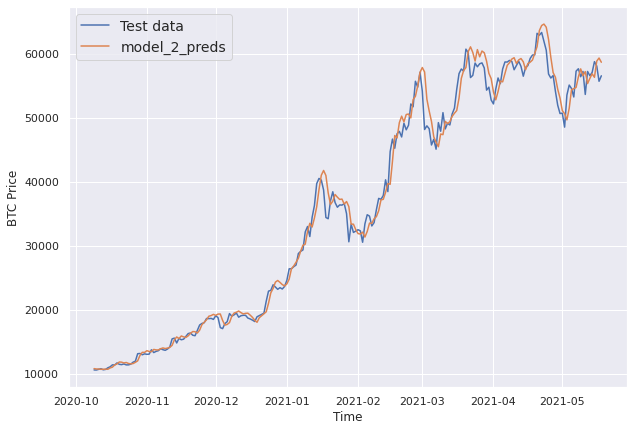

In [94]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps = x_test[-len(test_windows):], 
                 values = test_horizons[:, 0], # merely only 1 horizon is plotted in all those 7 horizons
                 start = offset,
                 format="-",
                 label = "Test data")
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = tf.reduce_mean(model_3_preds, axis=1), # All the 7 horizons are condensed into 1
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

## Which of our models is performing the best so far? 

So we've trained a few models, now let's compare them and see how they've gone... 

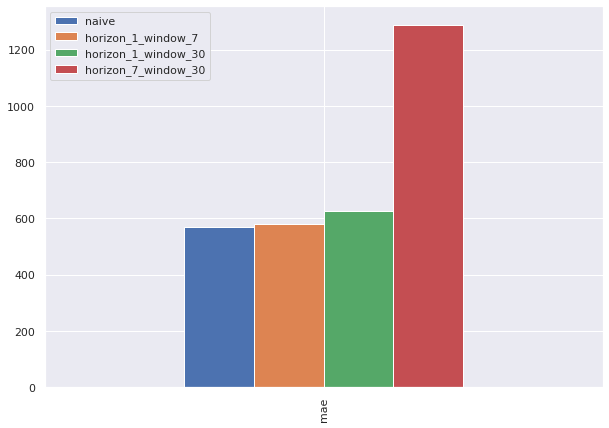

In [95]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

> 🔑 **Note:** You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly), a naïve model will often get fairly good results.

> 📖 **Resource:** For more on how autocorrelation influences a model's predictions, see the article [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424).

## Model 4: Conv1D

In [96]:
HORIZON = 1
WINDOW_SIZE = 7

In [97]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [98]:
# Create train/test sets
train_windows, test_windows, train_horizons, test_horizons = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_horizons), len(test_windows), len(test_horizons)

(2229, 2229, 551, 551)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [99]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [100]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [101]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [102]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [103]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(x=train_windows,
            y=train_horizons,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2957.6790  

18/18 [==============================] - 7s 72ms/step - loss: 2999.3892 - val_loss: 14942.9404
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 2967.1638 - val_loss: 17182.7051
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 2963.1228 - val_loss: 16403.4941
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 2966.4036 - val_loss: 16412.0645
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 2966.3813 - val_loss: 16966.0938
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 2964.7710 - val_loss: 16425.2129
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 2963.9490 - val_loss: 15705.6299
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 2967.0327 - val_loss: 16618.8477
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 2970.2056 - val_loss: 17227.8125
Epoch 10/100
18/18 [==============================] - 0s 

In [104]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 1, 7)           0         
                                                                 
 conv1d (Conv1D)             (None, 1, 1, 128)         4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1, 1)           129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [105]:
model_4.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 15515.2119


15515.2119140625

In [106]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_horizons)

18/18 [==============================] - 1s 6ms/step - loss: 14942.9414


14942.94140625

In [107]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 2325.2573,  2298.7224,  2312.4578,  2261.2   ,  2255.6562,
        2246.9558,  2204.2834,  2184.038 ,  2140.402 ,  2084.4773,
        2012.6359,  1960.3086,  1914.0575,  1908.2151,  1870.7526,
        1935.1509,  1905.7083,  1993.0164,  1960.9226,  1996.4664,
        1947.2803,  1953.2646,  1921.5469,  1930.3695,  1937.4431,
        1960.6921,  1969.7158,  1963.0201,  1947.7396,  1915.617 ,
        1911.1595,  1897.1311,  1881.6257,  1885.1157,  1842.9574,
        1817.0833,  1865.8663,  1830.8928,  1894.1567,  1871.5964,
        1923.7323,  1892.2578,  1899.1165,  1899.7816,  1896.4446,
        1895.2997,  1908.3706,  1919.6835,  1915.202 ,  1914.8113,
        1901.1781,  1873.8099,  1895.0505,  1884.9591,  1921.9272,
        1952.7393,  2023.1823,  2064.6675,  2073.0635,  2116.761 ,
        2105.7573,  2135.2734,  2117.431 ,  2212.2673,  2227.0164,
        2283.3147,  2310.0806,  2337.9316,  2319.6338,  2301.5205,
        2294.7

In [108]:
model_4_results = evaluate_preds(tf.squeeze(test_horizons),
                                 model_4_preds)
model_4_results

{'mae': 14942.94,
 'mse': 392633060.0,
 'rmse': 19814.97,
 'mape': 73.88662,
 'mase': 26.080658}

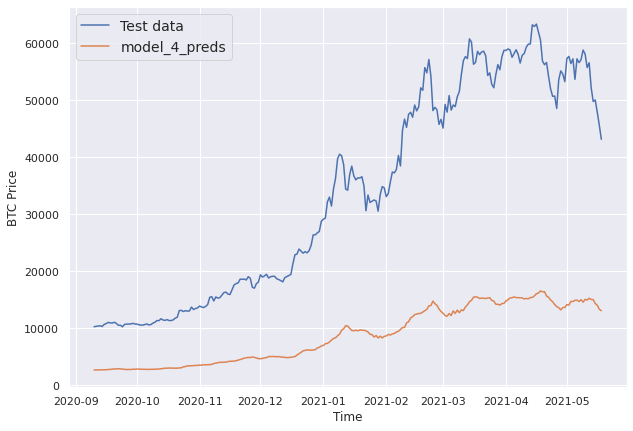

In [109]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_horizons[:,0],
                 start=offset,
                 format="-",
                 label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=model_4_preds,
                 start=offset,
                 format="-",
                 label="model_4_preds")

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [110]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [111]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(x=train_windows,
            y=train_horizons,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_horizons),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
18/18 [==============================] - 6s 140ms/step - loss: 2917.1948 - val_loss: 13638.6475
Epoch 2/100
18/18 [==============================] - 2s 124ms/step - loss: 1300.2419 - val_loss: 2634.0530
Epoch 3/100
18/18 [==============================] - 2s 121ms/step - loss: 276.4797 - val_loss: 1053.3490
Epoch 4/100
18/18 [==============================] - 3s 171ms/step - loss: 197.7673 - val_loss: 1038.9225
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 189.2469 - val_loss: 1057.0740
Epoch 6/100
18/18 [==============================] - 2s 139ms/step - loss: 182.6654 - val_loss: 1038.3674
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 181.7166 - val_loss: 1054.9678
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 181.6022 - val_loss: 1056.6394
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 178.8425 - val_loss: 1060.6772
Epoch 10/100
18/18 [==============================

In [112]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_3 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [113]:
model_5.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 653.3683


653.3683471679688

In [114]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 602.6288


602.6288452148438

In [115]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 8765.637 ,  8706.243 ,  8536.026 ,  8490.515 ,  8515.427 ,
        8300.812 ,  8149.7734,  8088.988 ,  7752.8315,  7354.405 ,
        7268.58  ,  7074.863 ,  7091.245 ,  7112.016 ,  7395.136 ,
        7419.006 ,  7660.978 ,  7631.2954,  7499.9233,  7380.783 ,
        7348.6455,  7229.812 ,  7325.631 ,  7467.7754,  7532.4434,
        7566.3584,  7447.1934,  7309.0728,  7223.4966,  7185.9297,
        7200.738 ,  7128.08  ,  7115.389 ,  6965.5513,  6693.137 ,
        7144.726 ,  7194.8696,  7148.45  ,  7271.9404,  7329.91  ,
        7196.4263,  7230.881 ,  7240.882 ,  7201.232 ,  7222.221 ,
        7299.119 ,  7370.69  ,  7310.0566,  7234.876 ,  7202.3286,
        7035.431 ,  7179.287 ,  7304.802 ,  7350.2   ,  7613.054 ,
        7977.    ,  8095.634 ,  7956.232 ,  8090.6235,  8126.4463,
        8142.0586,  8134.391 ,  8578.503 ,  8818.211 ,  8801.516 ,
        8931.742 ,  9021.151 ,  8777.403 ,  8677.386 ,  8714.942 ,
        8653.9

In [116]:
model_5_results = evaluate_preds(tf.squeeze(test_horizons), model_5_preds)
model_5_results

{'mae': 602.62885,
 'mse': 1283792.8,
 'rmse': 1133.0458,
 'mape': 2.6998868,
 'mase': 1.0517981}

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

> 🔑 **Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

In [117]:
btc_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [118]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50     # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25     # 28 November 2012
block_reward_3 = 12.5   # 9 July 2016
block_reward_4 = 6.25   # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [119]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - btc_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_price.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [120]:
# Add in block reward column
btc_price_block = btc_price.copy()
btc_price_block["block_reward"] = None

# Add block reward column corresponding values 
btc_price_block.iloc[:block_reward_2_days, -1] = block_reward_2
btc_price_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
btc_price_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [121]:
btc_price_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [122]:
btc_price_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

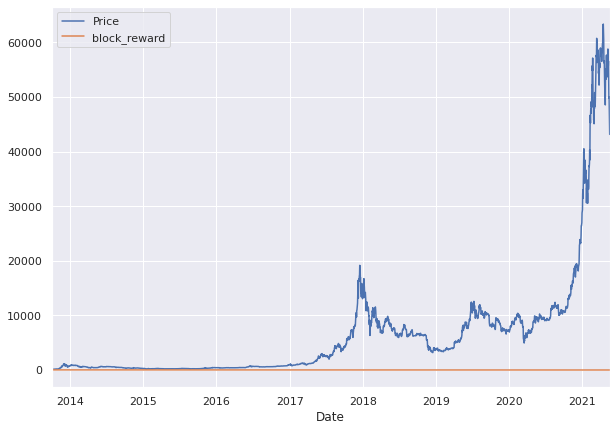

In [123]:
# Plot the block reward vs Price over time
btc_price_block.plot(figsize=(10,7))

Scaling is necessaey. because both x and y axes are in diffrent units.

 To compare it and interpret (and plot) in a good manner scaling is needed. 

In [124]:
from sklearn.preprocessing import minmax_scale

<AxesSubplot:xlabel='Date'>

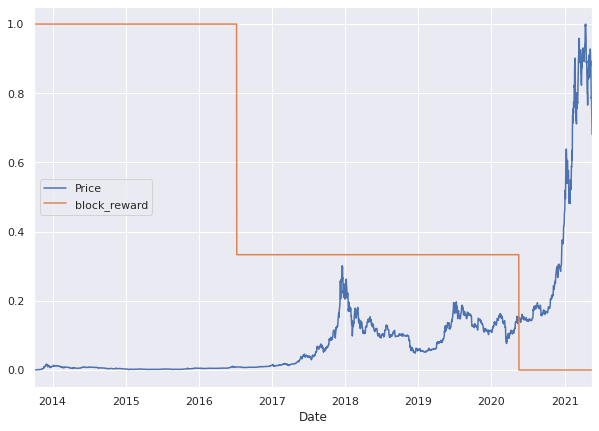

In [125]:
scaled_btc_df = pd.DataFrame(minmax_scale(btc_price_block[["Price", "block_reward"]]),
                             index=btc_price_block.index,
                             columns=btc_price_block.columns)
scaled_btc_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [126]:
HORIZON = 1
WINDOW_SIZE = 7

In [127]:
btc_windowed = btc_price_block.copy()

In [128]:
# Add window columns
for i in range(WINDOW_SIZE):
  btc_windowed[f"Price{i+1}"] = btc_windowed["Price"].shift(periods=i+1)  

In [129]:
btc_windowed.head(10)

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [130]:
btc_windowed.tail()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [131]:
# create X(window) and y(horizons) features
X = btc_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = btc_windowed.dropna()["Price"].astype(np.float32)

In [132]:
# make train test splits using indexing
split_size = int(len(y) * 0.8)
X_train = X[:split_size]
y_train = y[:split_size]
X_test = X[split_size:]
y_test = y[split_size:]

In [133]:
len(X_train), len(y_train), len(X_test), len(y_test) 

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [134]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_multivariate")

model_6.compile(loss="mae",
                optimizer = "Adam")

model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 2909.1580

18/18 [==============================] - 2s 45ms/step - loss: 1183.8041 - val_loss: 2553.4512
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 400.1512

18/18 [==============================] - 1s 36ms/step - loss: 343.4334 - val_loss: 1696.3702
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 210.6306

18/18 [==============================] - 1s 34ms/step - loss: 221.9931 - val_loss: 1336.1260
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 262.0375

18/18 [==============================] - 1s 36ms/step - loss: 204.3574 - val_loss: 1131.8739
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 193.2291

18/18 [==============================] - 1s 37ms/step - loss: 196.3577 - val_loss: 1049.3563
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 191.7591

18/18 [==============================] - 1s 37ms/step - loss: 191.7591 - val_loss: 1045.6106
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 187.1649

18/18 [==============================] - 1s 37ms/step - loss: 181.7652 - val_loss: 1034.6510
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 169.6623

18/18 [==============================] - 1s 37ms/step - loss: 170.5245 - val_loss: 919.6934
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 166.1209 - val_loss: 934.0194
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 154.3738

18/18 [==============================] - 1s 37ms/step - loss: 157.9892 - val_loss: 849.3334
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 169.2188

18/18 [==============================] - 1s 37ms/step - loss: 150.3688 - val_loss: 818.3100
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 144.1652 - val_loss: 835.6677
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 143.4064 - val_loss: 882.7748
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 138.8063 - val_loss: 822.1934
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 136.6019

18/18 [==============================] - 1s 53ms/step - loss: 135.3636 - val_loss: 738.9094
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 128.7245

18/18 [==============================] - 1s 53ms/step - loss: 128.6951 - val_loss: 733.1823
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 125.8704 - val_loss: 767.9102
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 130.8033

18/18 [==============================] - 1s 41ms/step - loss: 125.8088 - val_loss: 676.8856
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 122.8250 - val_loss: 691.5305
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2179

18/18 [==============================] - 1s 36ms/step - loss: 120.3322 - val_loss: 660.9833
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 145.9295

18/18 [==============================] - 1s 35ms/step - loss: 122.8802 - val_loss: 655.2781
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 175.1988

18/18 [==============================] - 1s 54ms/step - loss: 118.9615 - val_loss: 654.5533
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 119.2061

18/18 [==============================] - 1s 34ms/step - loss: 120.7044 - val_loss: 645.4974
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3288 - val_loss: 656.8844
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1845

18/18 [==============================] - 1s 36ms/step - loss: 119.0587 - val_loss: 625.0695
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 116.4641

18/18 [==============================] - 1s 36ms/step - loss: 116.4641 - val_loss: 620.9143
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 117.5522 - val_loss: 621.1841
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 109.4844

18/18 [==============================] - 1s 34ms/step - loss: 114.5575 - val_loss: 614.4730
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6599 - val_loss: 629.4450
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 131.8072

18/18 [==============================] - 1s 35ms/step - loss: 118.4779 - val_loss: 608.5632
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8509 - val_loss: 757.0544
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 123.3156 - val_loss: 633.9347
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 114.6779

18/18 [==============================] - 1s 35ms/step - loss: 114.6779 - val_loss: 606.3171
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4367 - val_loss: 606.5659
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 101.8345

18/18 [==============================] - 1s 35ms/step - loss: 112.1797 - val_loss: 605.2051
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 158.4704

18/18 [==============================] - 1s 34ms/step - loss: 118.0434 - val_loss: 603.1370
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 114.3033

18/18 [==============================] - 1s 35ms/step - loss: 114.3033 - val_loss: 596.5578
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 99.5335

18/18 [==============================] - 1s 34ms/step - loss: 113.1495 - val_loss: 592.7372
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6909 - val_loss: 629.8508
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 112.1504

18/18 [==============================] - 1s 35ms/step - loss: 111.7559 - val_loss: 591.8184
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 111.8087 - val_loss: 660.2911
Epoch 42/100
14/18 [======================>.......] - ETA: 0s - loss: 115.3740

18/18 [==============================] - 1s 53ms/step - loss: 117.2298 - val_loss: 588.1786
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 110.8272 - val_loss: 636.4265
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 112.5307

18/18 [==============================] - 1s 52ms/step - loss: 113.0830 - val_loss: 587.2040
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 107.5067

18/18 [==============================] - 1s 38ms/step - loss: 110.2223 - val_loss: 585.8703
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3676 - val_loss: 588.1490
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2728 - val_loss: 674.1180
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4876 - val_loss: 589.2213
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1621 - val_loss: 635.2274
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9895 - val_loss: 628.7686
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 98.6491

18/18 [==============================] - 1s 34ms/step - loss: 111.1783 - val_loss: 582.4936
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8425 - val_loss: 611.0015
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7349 - val_loss: 588.4907
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3045 - val_loss: 595.0739
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2072

18/18 [==============================] - 1s 35ms/step - loss: 112.0582 - val_loss: 578.8345
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1247 - val_loss: 784.6614
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8812 - val_loss: 717.5964
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4312 - val_loss: 664.8187
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4024 - val_loss: 579.7092
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1150 - val_loss: 587.1871
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4833 - val_loss: 580.5412
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5228 - val_loss: 601.0153
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0779 - val_loss: 627.2056
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 35ms/step - loss: 112.9079 - val_loss: 576.8706
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2772 - val_loss: 586.7290
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0591 - val_loss: 667.8881
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 123.0780 - val_loss: 648.2994
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 125.7832 - val_loss: 612.7816
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9050 - val_loss: 579.8393
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 108.6275

18/18 [==============================] - 1s 34ms/step - loss: 108.6275 - val_loss: 569.9373
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0937 - val_loss: 590.4890
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2605 - val_loss: 573.4158
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2052 - val_loss: 577.9207
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3892 - val_loss: 582.4196
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5423 - val_loss: 574.9137
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4599 - val_loss: 579.9503
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8247 - val_loss: 618.6888
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6875 - val_loss: 582.8218
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.436

18/18 [==============================] - 1s 34ms/step - loss: 106.7182 - val_loss: 568.5204
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 191.4038

18/18 [==============================] - 1s 34ms/step - loss: 113.6406 - val_loss: 567.8328
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0656 - val_loss: 665.8589
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8845 - val_loss: 588.7434
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0478 - val_loss: 568.2111
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4618 - val_loss: 619.7492
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9497 - val_loss: 586.4230
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6985 - val_loss: 587.7302
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9644 - val_loss: 573.4513
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8304 - val_loss: 621.7935
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 34ms/step - loss: 109.2346 - val_loss: 566.0433
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4742 - val_loss: 615.4200
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7633 - val_loss: 574.2794
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3282 - val_loss: 566.9597
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9771 - val_loss: 643.7833
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4420 - val_loss: 590.6822
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6260 - val_loss: 567.0587
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 149.3890

18/18 [==============================] - 1s 61ms/step - loss: 107.8381 - val_loss: 566.0049
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6477 - val_loss: 616.0374


In [135]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 616.0373


616.0372924804688

In [136]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 566.0052


566.0051879882812

In [137]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8870.746 ,  8778.072 ,  9027.649 ,  8799.438 ,  8739.983 ,
        8744.128 ,  8685.649 ,  8529.574 ,  8464.757 ,  8527.818 ,
        8272.193 ,  8119.512 ,  8071.2495,  7693.8477,  7296.1035,
        7260.6274,  7082.7056,  7168.6284,  7150.2764,  7461.3813,
        7438.8857,  7680.6934,  7600.055 ,  7419.315 ,  7337.6807,
        7319.5386,  7238.7554,  7362.524 ,  7504.8535,  7547.845 ,
        7557.763 ,  7379.639 ,  7254.394 ,  7201.6787,  7193.6714,
        7233.456 ,  7117.831 ,  7105.406 ,  6925.282 ,  6628.7007,
        7261.209 ,  7241.8125,  7155.416 ,  7251.625 ,  7266.7744,
        7197.318 ,  7220.2227,  7227.477 ,  7198.297 ,  7222.691 ,
        7305.7856,  7387.518 ,  7287.719 ,  7193.2466,  7175.7427,
        6999.4116,  7226.966 ,  7347.5195,  7365.224 ,  7658.1265,
        8015.3413,  8108.5396,  7873.3643,  8037.405 ,  8107.3955,
        8159.349 ,  8131.655 ,  8637.645 ,  8875.362 ,  8769.66  ,
        8893.5

In [138]:
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 566.0051,
 'mse': 1165895.6,
 'rmse': 1079.7665,
 'mape': 2.5278103,
 'mase': 0.99431425}

In [139]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

For a challenge on different ways to potentially improve the multivariate time series model, see the reference here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#model-6-dense-multivariate-time-series

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture 
* Potentially get state of the art results on our problem 

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models


In [140]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
             input_size: int,
             theta_size: int,
             horizon: int,
             n_neurons: int,
             n_layers: int,
             **kwargs):   # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta_layer")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

      # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast


In [141]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [142]:
tf.random.set_seed(42)

# setup dummy NBeatsBlock layer to represent inputs & outputs
dummy_NbeatsBlock = NBeatsBlock(input_size = WINDOW_SIZE,
                                theta_size = WINDOW_SIZE + HORIZON,
                                horizon = HORIZON,
                                n_neurons = 128,
                                n_layers = 4)

In [143]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [144]:
values = dummy_NbeatsBlock(dummy_inputs)
#print(f"Backcast:{tf.squeeze(backcast)}")
#print(f"Forecast:{tf.squeeze(forecast)}")
values

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-0.48447528,  0.02942157,  0.39211643,  0.5166464 , -0.6627047 ,
          0.9640588 ,  0.19114612]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.09210977]], dtype=float32)>)

### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance 

In [145]:
HORIZON = 1
WINDOW_SIZE = 7 

In [146]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
btc_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [147]:
btc_nbeats = btc_price.copy()

for i in range(WINDOW_SIZE):
  btc_nbeats[f"Price {i+1}"] = btc_price_block["Price"].shift(periods=i+1)

In [148]:
btc_nbeats.head(10)

,Price,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [149]:
X = btc_nbeats.dropna().drop("Price", axis=1).astype(np.float32)
y = btc_nbeats.dropna()["Price"].astype(np.float32)

In [150]:
split_size = int(len(X) * 0.8)

X_train = X[:split_size]
y_train = y[:split_size]
X_test = X[split_size:]
y_test = y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [151]:
train_features = tf.data.Dataset.from_tensor_slices(X_train)
train_labels = tf.data.Dataset.from_tensor_slices(y_train)

test_features = tf.data.Dataset.from_tensor_slices(X_test)
test_labels = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features, train_labels))
test_dataset = tf.data.Dataset.zip((test_features, test_labels))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf 

In [152]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [153]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks: 
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance) 

In [154]:
%%time

tf.random.set_seed(42)

# 1. Setup instance of NBeatsBlock
NBeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = NBeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
                                          input_size = INPUT_SIZE,
                                          theta_size = THETA_SIZE,
                                          horizon = HORIZON,
                                          n_neurons = N_NEURONS, 
                                          n_layers = N_LAYERS, 
                                          name = f"NBeatsBlock_{i}" ) (residuals)
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss = "mae",
                optimizer = "Adam")

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=1,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])

Epoch 1/5000
3/3 [==============================] - 54s 959ms/step - loss: 669.6974 - val_loss: 700785.5000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 163ms/step - loss: 16533.1191 - val_loss: 6311.4395 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 149ms/step - loss: 578.4639 - val_loss: 1427.7751 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 132ms/step - loss: 1246.0732 - val_loss: 1359.6794 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 60ms/step - loss: 369.3221 - val_loss: 2575.5608 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 61ms/step - loss: 684.7947 - val_loss: 5294.6958 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 59ms/step - loss: 1262.8630 - val_loss: 5533.7920 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 66ms/step - loss: 630.1919 - val_loss: 1754.1417 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] - 0

In [155]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 577.1987


577.1986694335938

In [156]:
model_7_preds = make_preds(model_7, test_dataset)

1/1 [==============================] - 1s 1s/step


In [157]:
model_7_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8857.41  ,  8782.283 ,  9011.248 ,  8766.554 ,  8736.495 ,
        8731.616 ,  8659.413 ,  8512.958 ,  8458.822 ,  8508.735 ,
        8252.275 ,  8117.6465,  8066.451 ,  7684.818 ,  7309.0127,
        7282.9736,  7109.1313,  7217.6025,  7128.5557,  7447.5605,
        7421.003 ,  7686.9336,  7601.163 ,  7399.4023,  7328.0005,
        7306.774 ,  7221.332 ,  7352.4097,  7482.2935,  7528.1914,
        7545.4536,  7358.9526,  7244.435 ,  7193.29  ,  7180.6855,
        7218.624 ,  7103.7104,  7095.0874,  6913.4614,  6629.0825,
        7260.863 ,  7205.6304,  7147.0913,  7252.758 ,  7248.641 ,
        7193.3896,  7208.5747,  7205.8457,  7177.297 ,  7206.069 ,
        7285.86  ,  7371.105 ,  7264.767 ,  7178.4204,  7161.609 ,
        6985.385 ,  7216.1   ,  7321.553 ,  7342.1685,  7677.62  ,
        8047.815 ,  8146.458 ,  7880.7583,  8048.7114,  8105.175 ,
        8144.3306,  8109.874 ,  8656.079 ,  8917.54  ,  8778.355 ,
        8921.5

In [158]:
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 577.19867,
 'mse': 1185492.4,
 'rmse': 1088.8031,
 'mape': 2.6595294,
 'mase': 1.0139782}

In [159]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created 

In [160]:
from tensorflow.keras.utils import plot_model

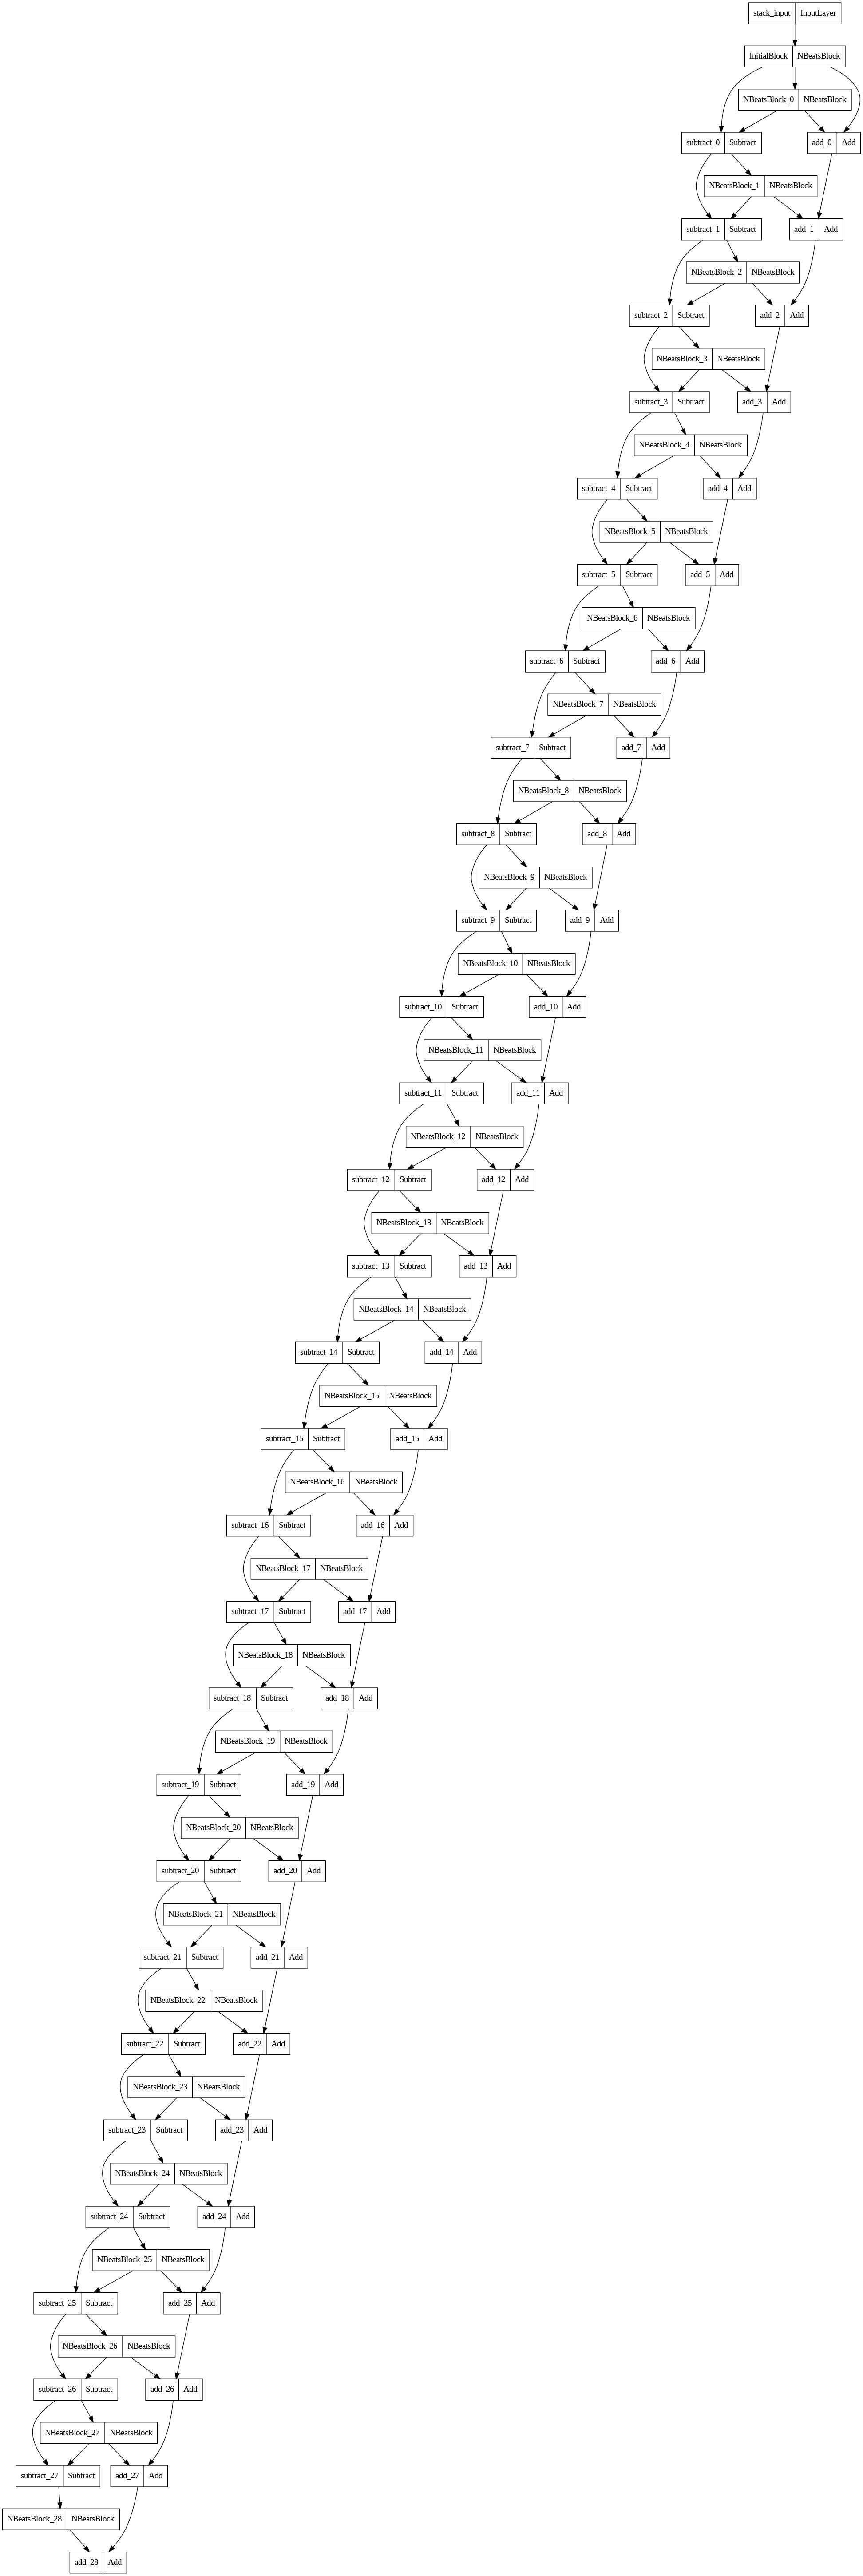

In [161]:
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [162]:
HORIZON = 1
WINDOW_SIZE = 7

### Constructing and fitting and ensemble of models (using different loss functions)

In [163]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """

  # Make empty list for trained ensemble models
  ensemble_models = []

  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer="Adam",
                    metrics=["mae", "mse"])
      
      model.fit(train_dataset,
                epochs=num_epochs,
                verbose=1,
                validation_data=test_dataset,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)

  return ensemble_models

In [164]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Streaming output truncated to the last 5000 lines.
Epoch 418/1000
3/3 [==============================] - 0s 27ms/step - loss: 97717.1719 - mae: 142.3944 - mse: 97717.1719 - val_loss: 1298133.1250 - val_mae: 612.8069 - val_mse: 1298133.1250 - lr: 0.0010
Epoch 419/1000
3/3 [==============================] - 0s 15ms/step - loss: 92496.8906 - mae: 145.5346 - mse: 92496.8906 - val_loss: 1577717.5000 - val_mae: 728.6360 - val_mse: 1577717.5000 - lr: 0.0010
Epoch 420/1000
3/3 [==============================] - 0s 23ms/step - loss: 72660.2578 - mae: 113.7578 - mse: 72660.2578 - val_loss: 1449734.2500 - val_mae: 658.6501 - val_mse: 1449734.2500 - lr: 0.0010
Epoch 421/1000
3/3 [==============================] - 0s 24ms/step - loss: 71550.4375 - mae: 112.0495 - mse: 71550.4375 - val_loss: 1351911.3750 - val_mae: 642.5869 - val_mse: 1351911.3750 - lr: 0.0010
Epoch 422/1000
3/3 [==============================] - 0s 19ms/step - loss: 75964.5312 - mae: 126.1100 - mse: 75964.5312 - val_loss: 1297719.8

### Make predictions with our ensemble model

In [ ]:
ensemble_models

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [169]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models,
                                      test_dataset)


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step
CPU times: user 727 ms, sys: 27.1 ms, total: 754 ms
Wall time: 851 ms


In [ ]:
ensemble_preds

Our ensemble preds come out in multiple dimensions but to combine into **point predictions** we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [170]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8784.813 ,  8771.017 ,  9072.544 ,  8718.201 ,  8744.125 ,
        8732.277 ,  8657.087 ,  8476.4795,  8459.151 ,  8525.474 ,
        8196.532 ,  8099.351 ,  8056.9087,  7612.0957,  7285.806 ,
        7322.464 ,  7067.1455,  7213.861 ,  7125.4155,  7528.7217,
        7399.4053,  7750.7676,  7558.826 ,  7404.3994,  7310.8447,
        7312.901 ,  7196.6885,  7393.4927,  7519.0894,  7549.8223,
        7549.6743,  7335.595 ,  7224.723 ,  7175.5903,  7179.7573,
        7231.489 ,  7087.131 ,  7104.1357,  6867.2393,  6580.894 ,
        7410.9497,  7165.8047,  7164.253 ,  7254.2705,  7269.8726,
        7189.312 ,  7227.868 ,  7212.652 ,  7178.1196,  7219.8247,
        7312.3965,  7392.252 ,  7251.3315,  7171.197 ,  7160.9263,
        6940.8057,  7277.9697,  7347.3237,  7369.4053,  7711.296 ,
        8077.5938,  8154.1753,  7836.9   ,  8087.205 ,  8100.1143,
        8172.1387,  8101.6104,  8753.342 ,  8913.844 ,  8777.722 ,
        8925.0

In [171]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8772.921 ,  8778.4   ,  9081.62  ,  8699.709 ,  8742.244 ,
        8742.313 ,  8651.788 ,  8466.228 ,  8464.137 ,  8527.901 ,
        8199.98  ,  8105.0435,  8058.1597,  7618.4946,  7288.1484,
        7312.945 ,  7072.01  ,  7204.173 ,  7133.337 ,  7530.1787,
        7395.33  ,  7751.009 ,  7564.3555,  7401.8306,  7306.527 ,
        7309.2456,  7188.684 ,  7389.972 ,  7518.6978,  7551.205 ,
        7552.201 ,  7334.8086,  7233.6016,  7171.1826,  7181.602 ,
        7235.1426,  7091.5947,  7102.1274,  6871.6934,  6581.8467,
        7425.718 ,  7176.6304,  7176.7207,  7242.8374,  7272.2104,
        7207.47  ,  7233.9165,  7211.8447,  7181.1094,  7219.5938,
        7311.9634,  7389.8916,  7251.978 ,  7170.8403,  7163.707 ,
        6942.8315,  7281.821 ,  7345.284 ,  7375.974 ,  7708.6733,
        8082.3525,  8147.1704,  7832.4336,  8100.2573,  8101.2153,
        8166.3076,  8099.8413,  8747.687 ,  8914.152 ,  8791.047 ,
        8919.001 ,  8965.955 ,  8674.782 ,  8633.108 ,  8703.2

In [172]:
model_8_results = evaluate_preds(y_test, ensemble_mean)
model_8_results

{'mae': 567.3494,
 'mse': 1143034.2,
 'rmse': 1069.1278,
 'mape': 2.5682266,
 'mase': 0.9966758}

In [244]:
model_8_results = evaluate_preds(y_test, ensemble_median)
model_8_results

{'mae': 17129.19,
 'mse': 614453250.0,
 'rmse': 23715.238,
 'mape': 121.36233,
 'mase': 26.507475}

In [174]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [177]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds,axis=0)

  upper, lower = preds_mean + interval, preds_mean - interval
  
  return upper, lower

In [178]:
upper, lower = get_upper_lower(ensemble_preds)

> 📖 **Resource:** Many of the steps we've taken above have inspired/referenced from the Machine Learning Mastery blog post on [*Prediction Intervals for Deep Learning Neural Networks*](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/)

In [175]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

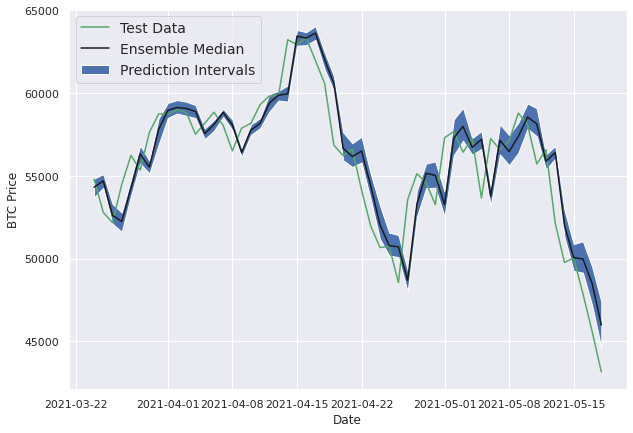

In [179]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmm... 

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

Weve only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future! 

In [180]:
HORIZON = 1
WINDOW_SIZE = 7

In [181]:
btc_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [182]:
btc_windowed.tail()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [183]:
# Train model on entire data to make predictions for the next day
X_all = btc_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = btc_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [184]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [185]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [186]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [187]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model (such as `model_9`)
 * a window into the future to predict (our `INTO_FUTURE` variable)
 * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [188]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [215]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(into_future):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.
>
> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.
>
> As it is, the make_future_forecasts() function skips the retraining of a model part.

In [216]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55831.890625

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55831.890625  ] -> Prediction: 50232.96875

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55831.890625   50232.96875   ] -> Prediction: 49349.53125

1/1 [==============================] - 0s 22ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55831.890625   50232.96875    49349.53125   ] -> Prediction: 49945.5

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55831.890625
 50232.96875    49349.53125    49945.5       ] -> Prediction

### Plot future forecasts

In [224]:
future_forecast

[55831.89,
 50232.97,
 49349.53,
 49945.5,
 47273.406,
 45826.08,
 48905.996,
 53823.2,
 49279.023,
 49791.867,
 49571.03,
 47194.484,
 48000.113,
 51292.914]

In [218]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D")         # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D")      # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [219]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = btc_price.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [222]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [225]:
btc_price.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [226]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps.shape, future_forecast.shape

((15,), (15,))

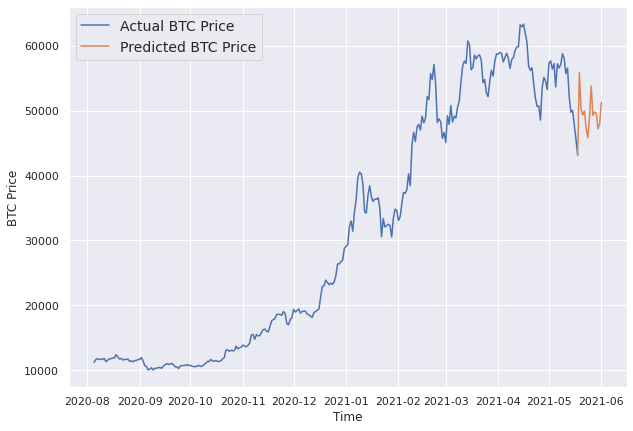

In [227]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(btc_price.index, btc_price["Price"], start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [229]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [230]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361,   431.44471291])

In [231]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(btc_price.index) 
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

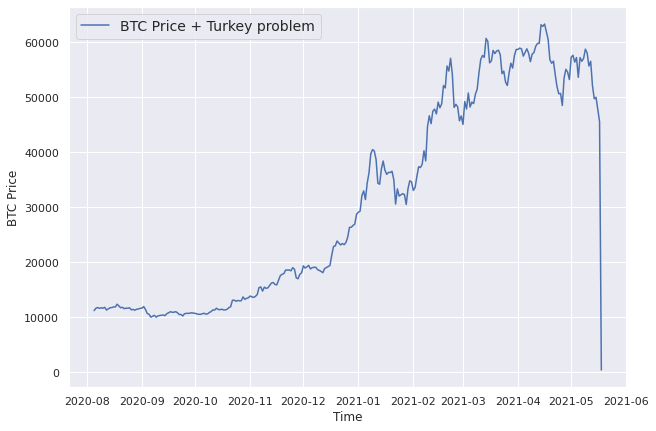

In [232]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [233]:
HORIZON = 1
WINDOW_SIZE = 7

In [234]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [245]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [236]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [237]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 770.4185


770.4185180664062

In [238]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 645.6003


645.6002807617188

In [239]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.744, 8764.09 , 9036.474, 8743.417, 8718.344, 8759.03 ,
       8662.999, 8495.583, 8460.888, 8519.535], dtype=float32)>

In [240]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17128.178,
 'mse': 614370400.0,
 'rmse': 23712.832,
 'mape': 121.34483,
 'mase': 26.50591}

In [241]:
model_1_results

{'mae': 579.6284,
 'mse': 1204564.5,
 'rmse': 1097.5265,
 'mape': 2.580942,
 'mase': 1.0116544}

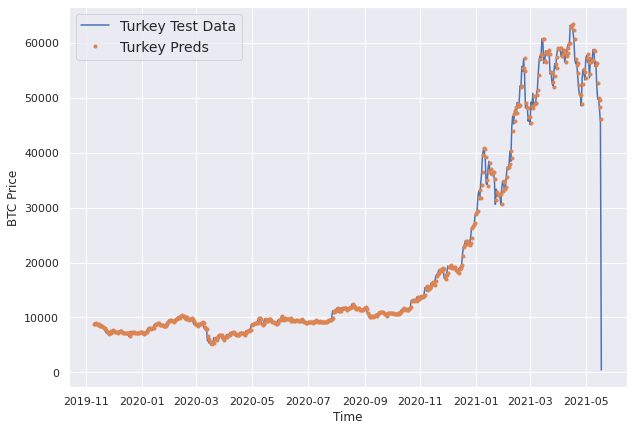

In [242]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);


## Compare models

In [246]:
model_8_results

{'mae': 17129.19,
 'mse': 614453250.0,
 'rmse': 23715.238,
 'mape': 121.36233,
 'mase': 26.507475}

In [247]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": model_8_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)                            

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,579.628418,1.204564e+06,1097.526489,2.580942,1.011654
model_2_dense_w30_h1,625.449585,1.352827e+06,1163.111084,2.755677,1.058622
model_3_dense_w30_h7,1289.510742,5.723754e+06,1481.763672,5.558530,2.204796
model_4_CONV1D,14942.940430,3.926331e+08,19814.970703,73.886620,26.080658
model_5_LSTM,602.628845,1.283793e+06,1133.045776,2.699887,1.051798
model_6_multivariate,566.005127,1.165896e+06,1079.766479,2.527810,0.994314
model_7_NBEATS,577.198669,1.185492e+06,1088.803101,2.659529,1.013978
model_8_ensemble,17129.189453,6.144532e+08,23715.238281,121.362328,26.507475
model_10_turkey,17128.177734,6.143704e+08,23712.832031,121.344833,26.505911


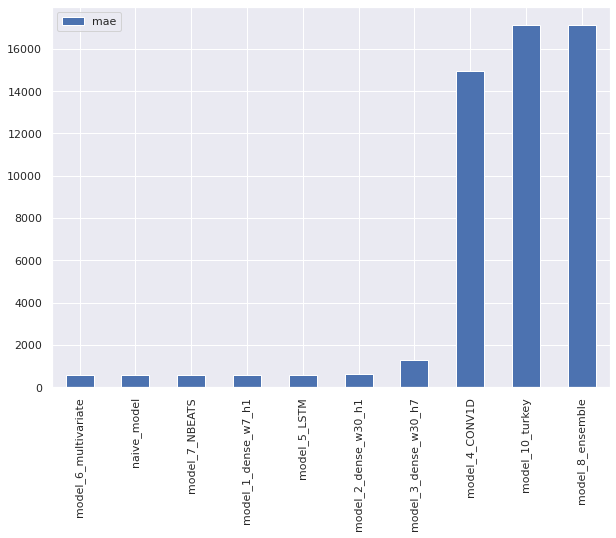

In [248]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

## Exercises and extra curriculum

What a journey we've been on!

Thank you so much for following along.

For all the exercises and extra curriculum related to this section, please refer to the course GitHub: https://github.com/mrdbourke/tensorflow-deep-learning#course-materials